### Further clean RISK variables (round to 2 decimals / integerize / ...)

In [1]:
import gc
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format
import random
import sys
import time
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
from pandarallel import pandarallel

In [2]:
from pathlib import Path
rootpath = Path.cwd().parent
sys.path.append(os.path.join(rootpath))

In [3]:
from utils.constants import *
from utils.eda_helpers import (
    plot_missing_proportion_barchart, get_cols, plot_scatterplot, plot_target_check, 
    plot_int_feature_distribution, plot_train_test_distribution, check_overlap_missing,
    insert_row_number, plot_sampled_time_series
)
from utils.eval_helpers import (
    plot_roc_curves, plot_feature_importance, 
    amex_metric, get_final_metric_df, amex_metric_np, lgb_amex_metric
)
from utils.extraction_helpers import read_file
from utils.feature_group import (
    CATEGORY_COLUMNS, CONTINUOUS_COLUMNS, BINARY_COLUMNS,
    MEAN_FEATURES, MIN_FEATURES, MAX_FEATURES, LAST_FEATURES, NON_FEATURE_COLUMNS
)
from utils.preprocess_helpers import *

In [4]:
%load_ext autoreload
%autoreload

In [5]:
gc.collect()

36

In [6]:
# df_list = drop_temp_columns(df_list)

In [7]:
START = time.time()

### Read Data

In [8]:
%%time
train = read_file(f"{RAW_TRAIN_PARQUET_PATH}/risk.parquet")
test = read_file(f"{RAW_TEST_PARQUET_PATH}/risk.parquet")

Shape of data: (5531451, 30)
Shape of data: (11363762, 30)
CPU times: user 4.32 s, sys: 6.35 s, total: 10.7 s
Wall time: 8.03 s


In [9]:
%%time
public_test, private_test = split_public_private(test)

Public size: 5719469, Private size: 5644293
CPU times: user 2.71 s, sys: 961 ms, total: 3.67 s
Wall time: 4.7 s


In [10]:
del test

In [11]:
%%time
labels = pd.read_csv(f"{RAW_DATA_PATH}/train_labels.csv")
if "target" not in train.columns:
    train = train.merge(labels, on="customer_ID", how="left")

CPU times: user 790 ms, sys: 367 ms, total: 1.16 s
Wall time: 1.16 s


In [12]:
train.shape, public_test.shape, private_test.shape

((5531451, 31), (5719469, 30), (5644293, 30))

In [13]:
print(sorted(get_cols(train, ["R_"])))

['R_1', 'R_10', 'R_11', 'R_12', 'R_13', 'R_14', 'R_15', 'R_16', 'R_17', 'R_18', 'R_19', 'R_2', 'R_20', 'R_21', 'R_22', 'R_23', 'R_24', 'R_25', 'R_26', 'R_27', 'R_28', 'R_3', 'R_4', 'R_5', 'R_6', 'R_7', 'R_8', 'R_9']


In [14]:
train["target"].mean()

0.24909720794778803

In [15]:
df_list = [train, public_test, private_test]

### R_1

0 null count, 0.000 null proportion
nan of the targets have label = 1


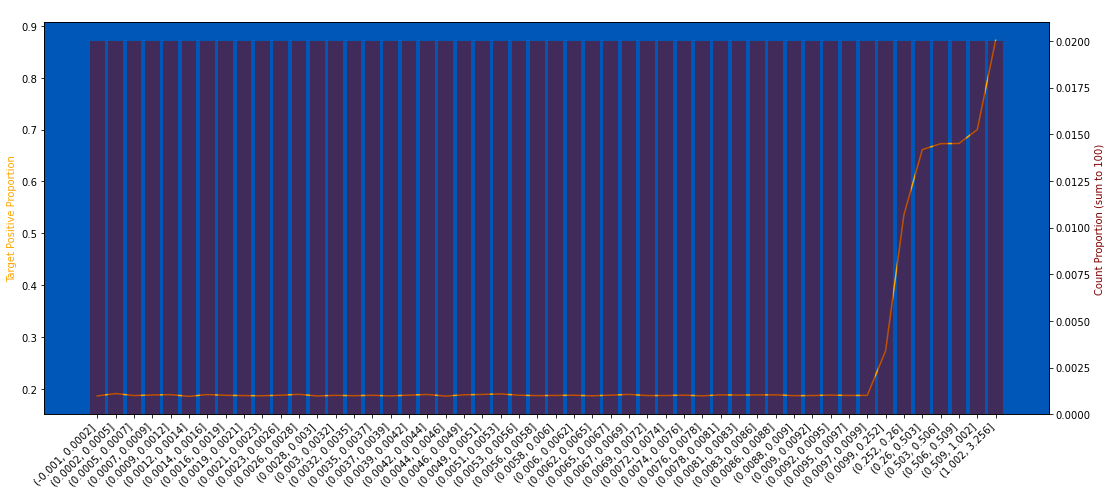

In [16]:
plot_target_check(train, "R_1", q=50, use_raw_bin=True)

In [17]:
%%time
df_list = round_dfs(df_list, col="R_1", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 292 ms, sys: 1.09 s, total: 1.38 s
Wall time: 2.27 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


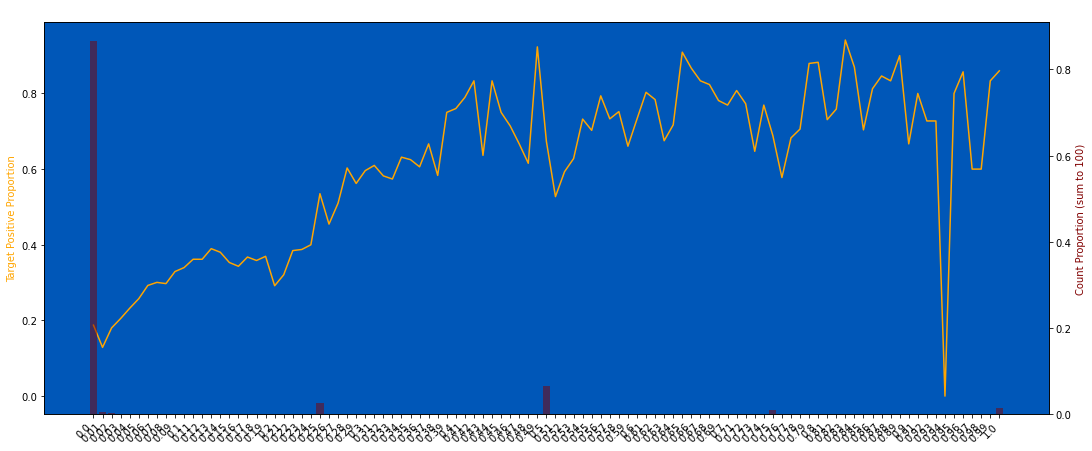

In [18]:
plot_target_check(train, "R_1", q=50, use_raw_bin=True, nunique_thr=1500, strfy_x=True)

**Comments:**
- Should group this variable based on the interval of 0.25, i.e. (0, 0.25, 0.5, 0.75, 1, 1.25, ...)

In [19]:
for df in df_list:
    df["R_1_"] = (df["R_1"] * 4).round(0)

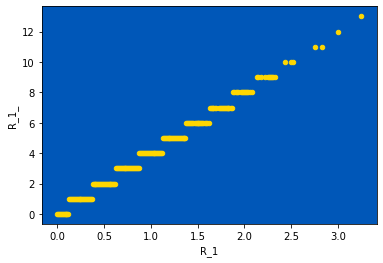

In [20]:
check_binning(train, "R_1", end=20000)

In [21]:
for df in df_list:
    df["R_1"] = (df["R_1"] * 4).round(0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


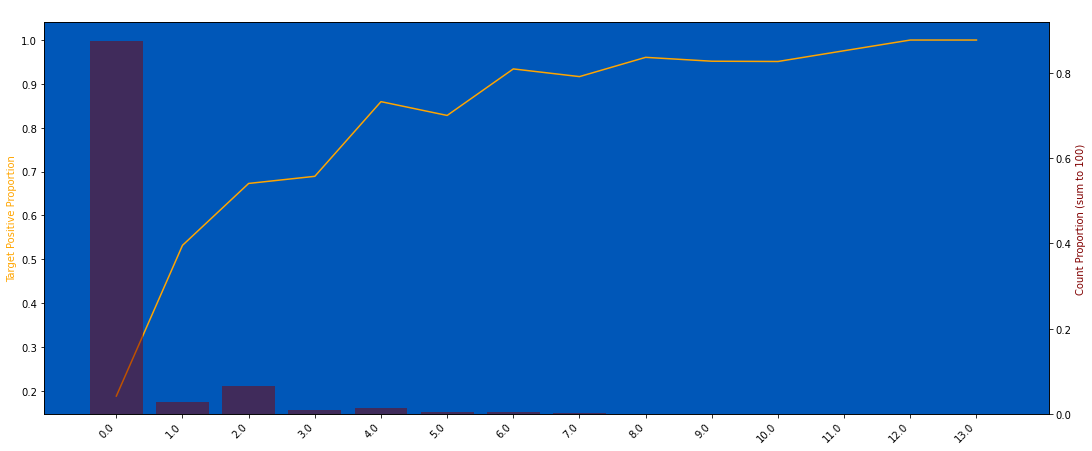

In [22]:
plot_target_check(train, "R_1", q=50, use_raw_bin=True, nunique_thr=2000, strfy_x=True, without_drop_tail=True)

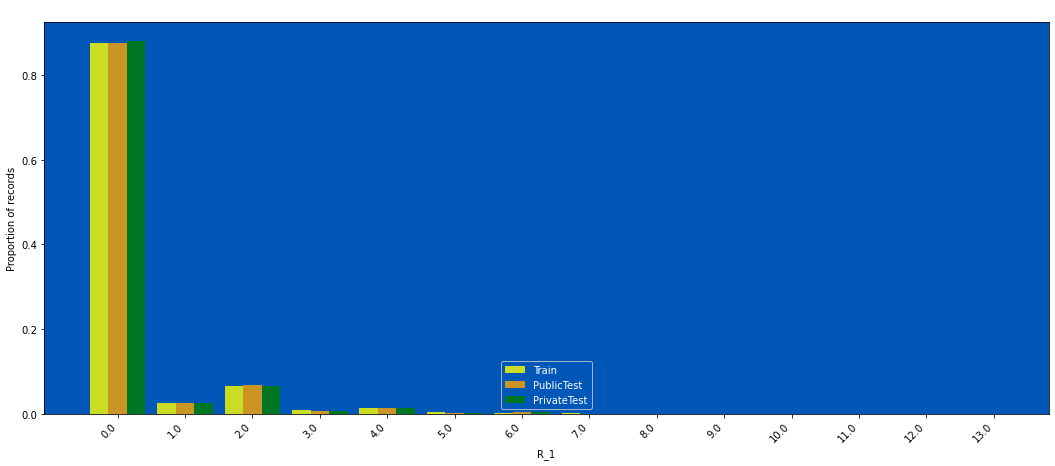

In [23]:
plot_train_test_distribution(df_list, "R_1", nunique_thr=10000, without_drop_tail=True)

### R_2

0 null count, 0.000 null proportion
nan of the targets have label = 1


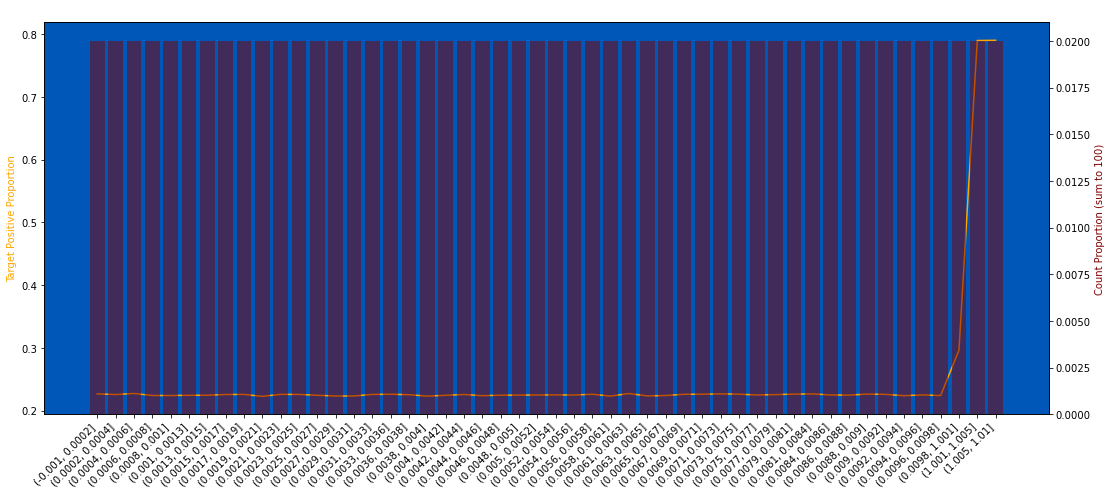

In [24]:
plot_target_check(train, "R_2", q=50, use_raw_bin=True)

In [25]:
%%time
df_list = round_dfs(df_list, col="R_2", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 291 ms, sys: 849 ms, total: 1.14 s
Wall time: 2.07 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


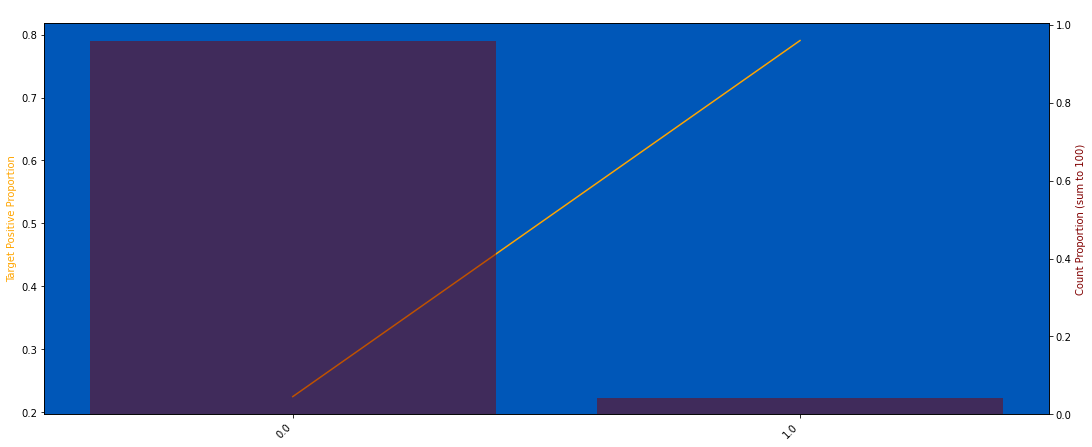

In [26]:
plot_target_check(train, "R_2", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


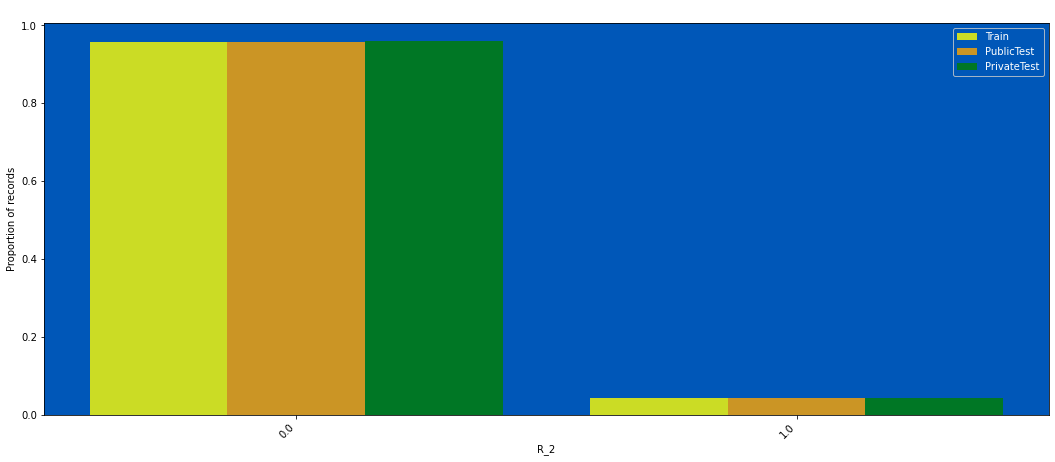

In [27]:
plot_train_test_distribution(df_list, "R_2", nunique_thr=100)

### R_3

0 null count, 0.000 null proportion
nan of the targets have label = 1


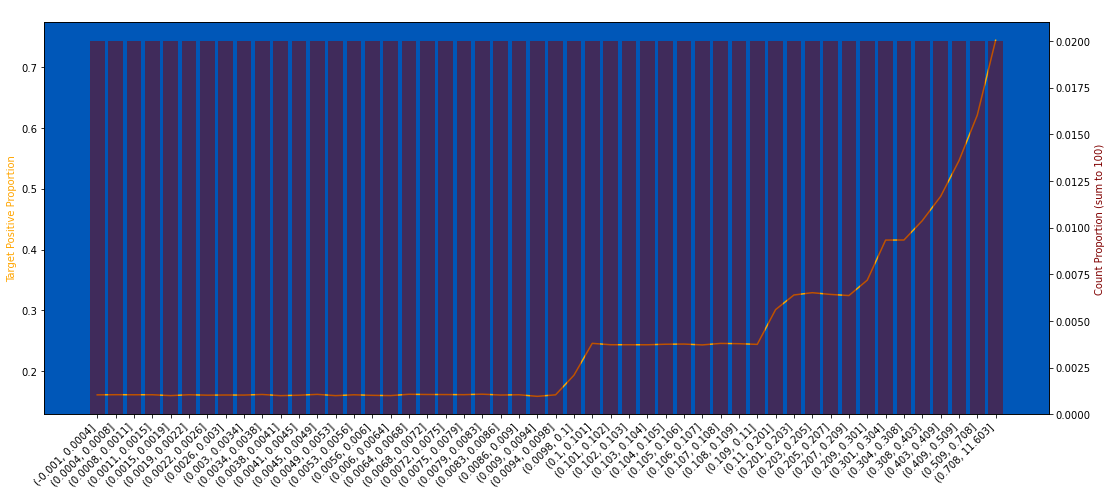

In [28]:
plot_target_check(train, "R_3", q=50, use_raw_bin=True)

In [29]:
%%time
df_list = round_dfs(df_list, col="R_3", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 283 ms, sys: 825 ms, total: 1.11 s
Wall time: 2.04 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


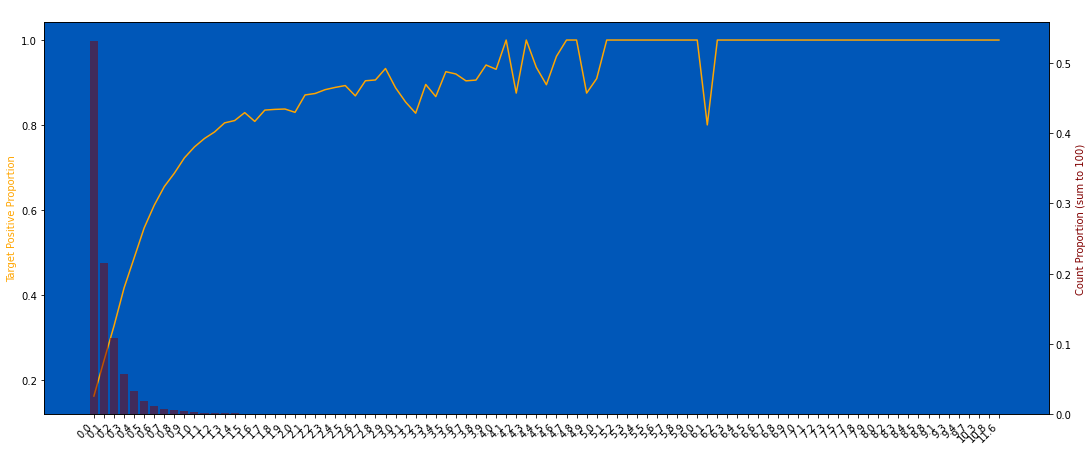

In [30]:
plot_target_check(train, "R_3", q=50, use_raw_bin=True, nunique_thr=1500, strfy_x=True, without_drop_tail=True)

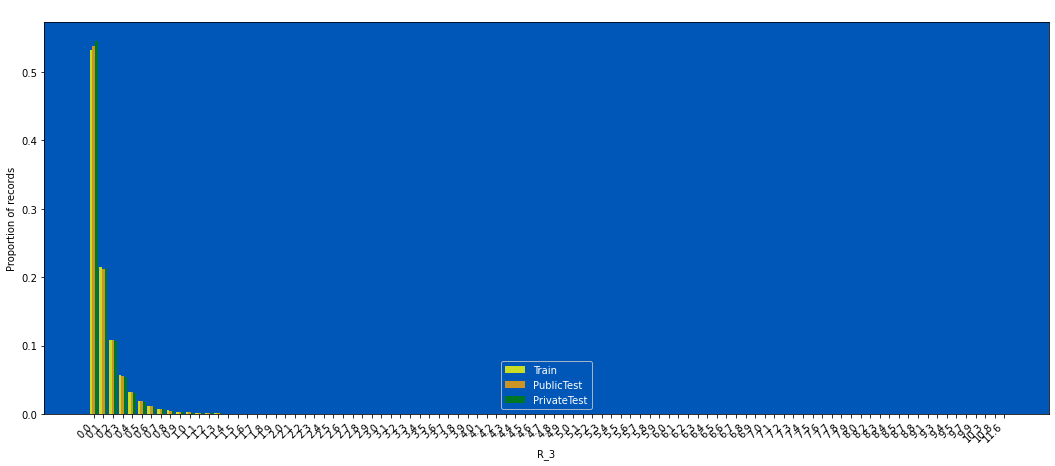

In [31]:
plot_train_test_distribution(df_list, "R_3", nunique_thr=100, without_drop_tail=True)

### R_4

0 null count, 0.000 null proportion
nan of the targets have label = 1


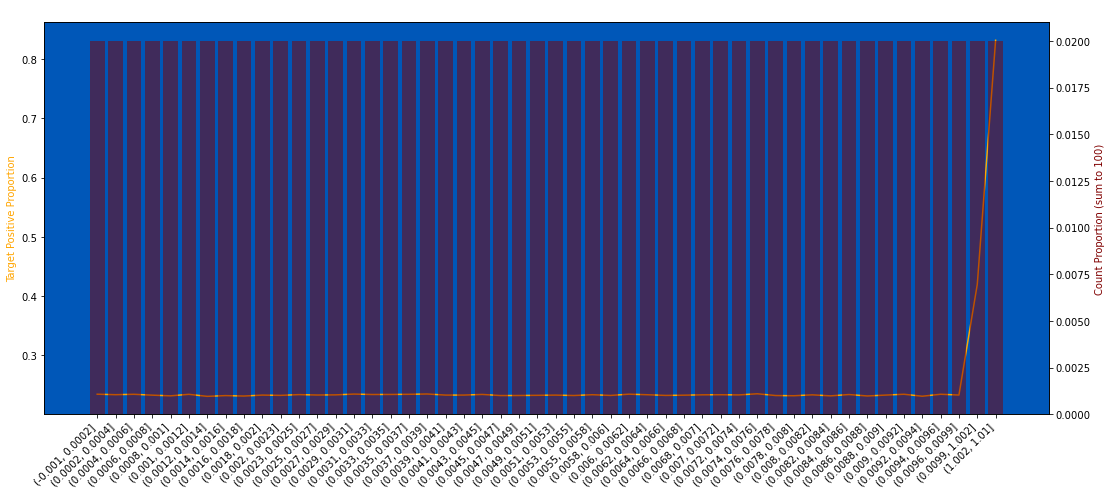

In [32]:
plot_target_check(train, "R_4", q=50, use_raw_bin=True)

In [33]:
%%time
df_list = round_dfs(df_list, col="R_4", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 281 ms, sys: 912 ms, total: 1.19 s
Wall time: 2.12 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


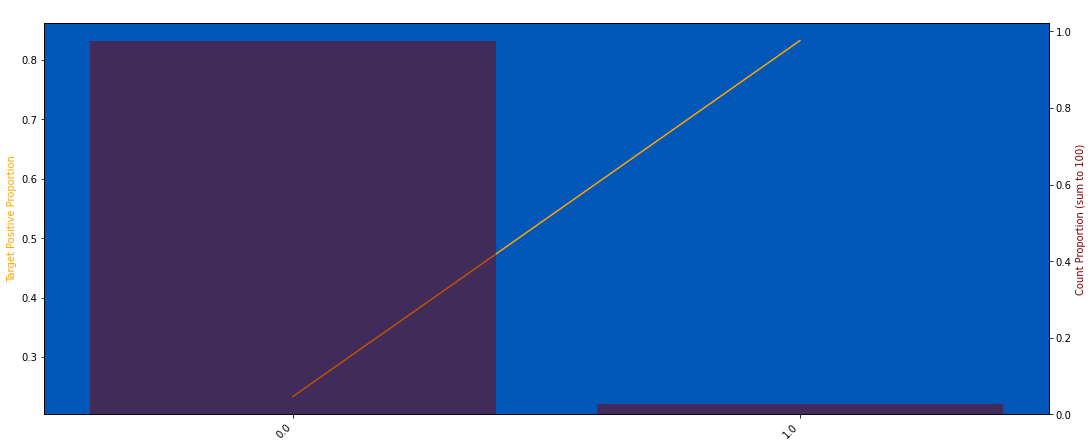

In [34]:
plot_target_check(train, "R_4", q=50, use_raw_bin=True, nunique_thr=15000, strfy_x=True, without_drop_tail=True)

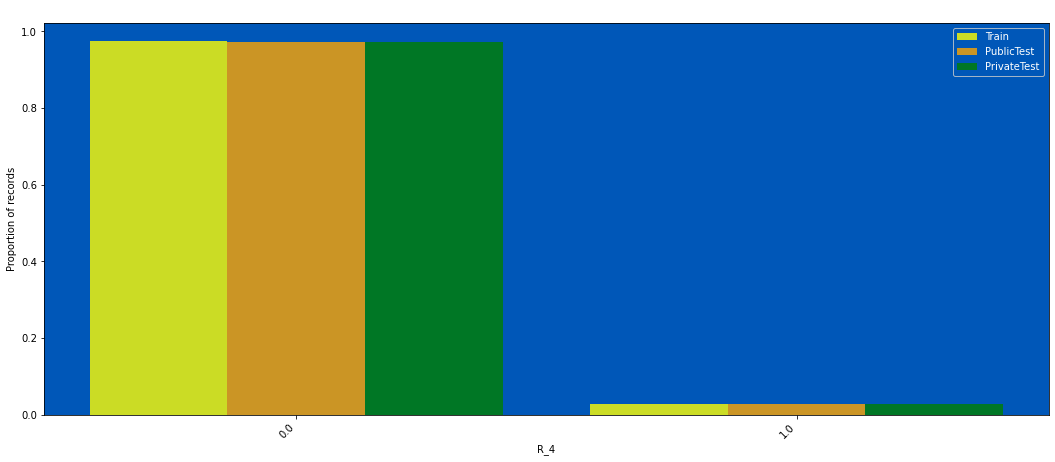

In [35]:
plot_train_test_distribution(df_list, "R_4", nunique_thr=100, without_drop_tail=True)

### R_5

0 null count, 0.000 null proportion
nan of the targets have label = 1


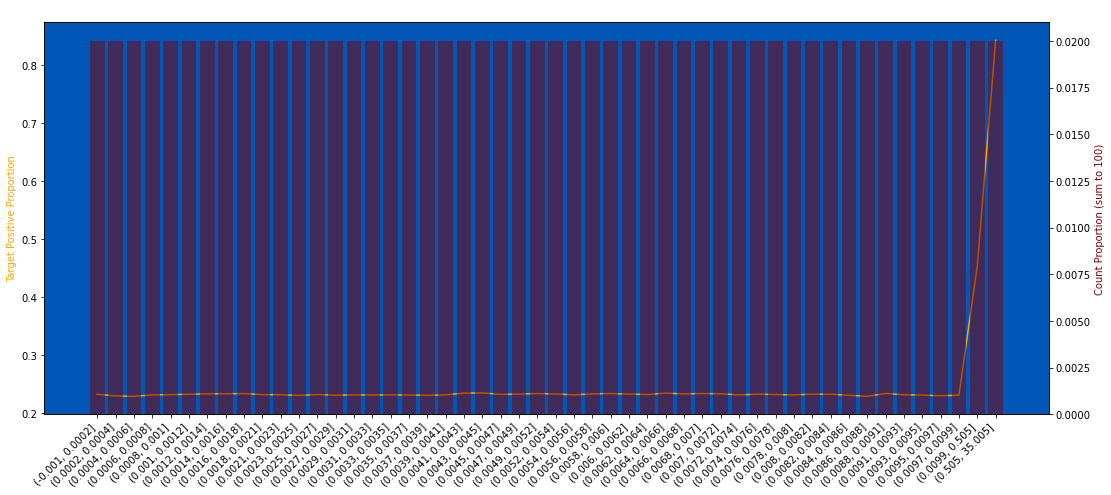

In [36]:
plot_target_check(train, "R_5", q=50, use_raw_bin=True, nunique_thr=2)

In [37]:
%%time
df_list = round_dfs(df_list, col="R_5", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 280 ms, sys: 944 ms, total: 1.22 s
Wall time: 2.15 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


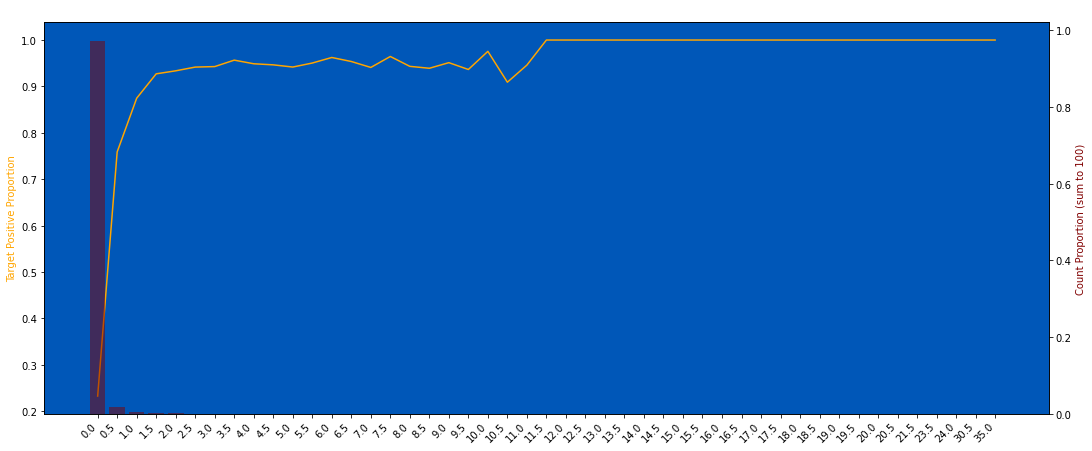

In [38]:
plot_target_check(train, "R_5", q=50, use_raw_bin=True, nunique_thr=15000, strfy_x=True, without_drop_tail=True)

In [39]:
for df in df_list:
    df["R_5"] *= 2

0 null count, 0.000 null proportion
nan of the targets have label = 1


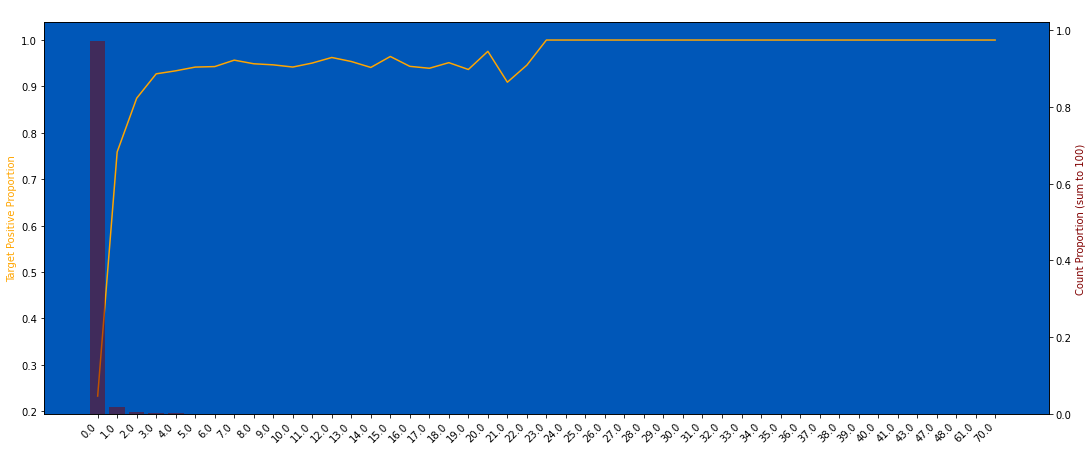

In [40]:
plot_target_check(train, "R_5", q=50, use_raw_bin=True, nunique_thr=15000, strfy_x=True, without_drop_tail=True)

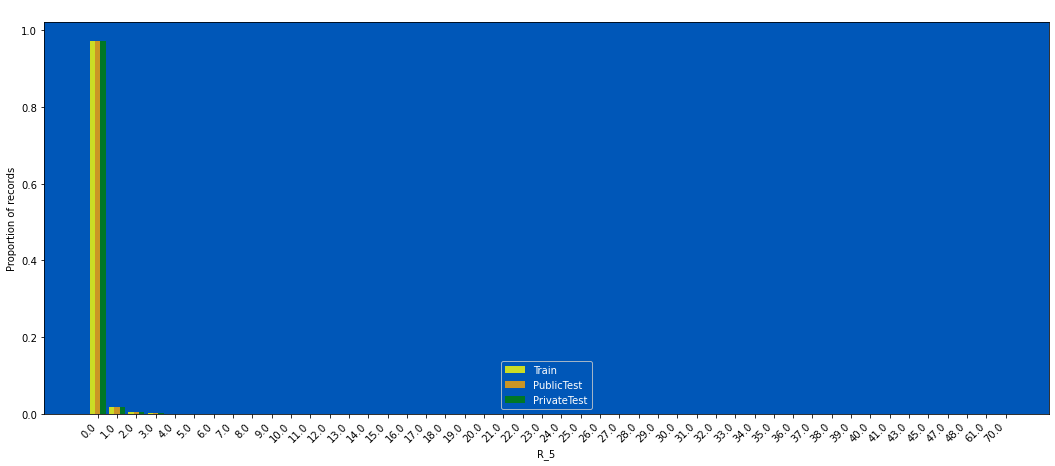

In [41]:
plot_train_test_distribution(df_list, "R_5", nunique_thr=100, without_drop_tail=True)

### R_6

0 null count, 0.000 null proportion
nan of the targets have label = 1


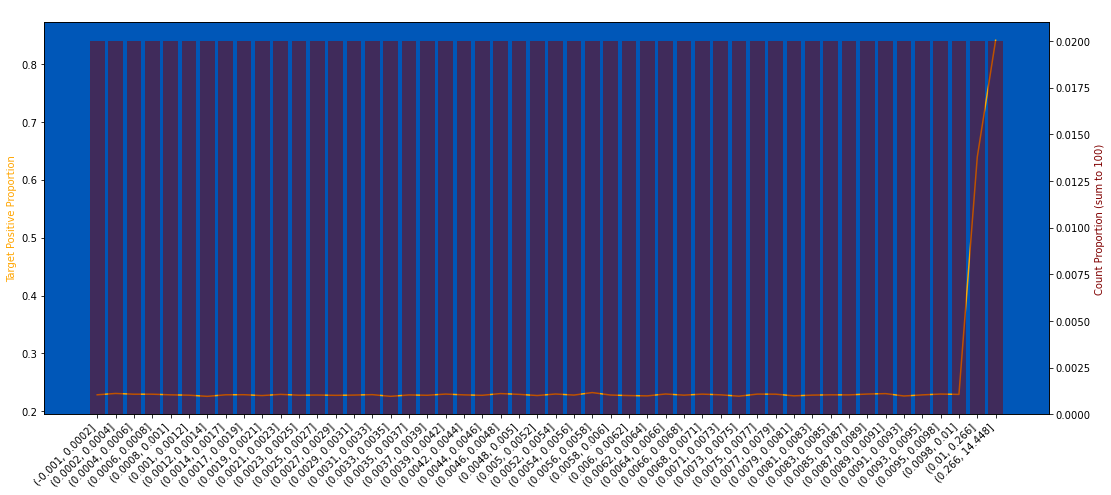

In [42]:
plot_target_check(train, "R_6", q=50, use_raw_bin=True)

In [43]:
%%time
df_list = round_dfs(df_list, col="R_6", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 277 ms, sys: 900 ms, total: 1.18 s
Wall time: 2.11 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


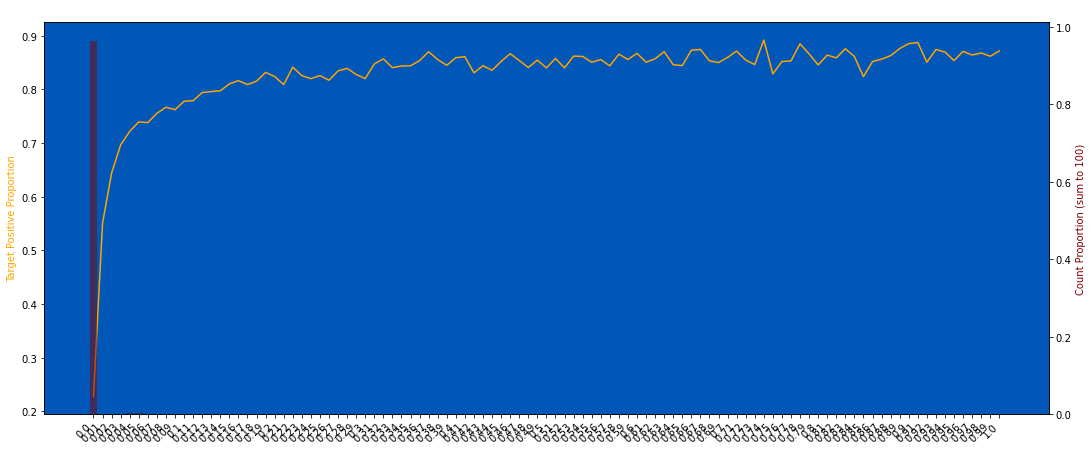

In [44]:
plot_target_check(train, "R_6", q=50, use_raw_bin=True, nunique_thr=2000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


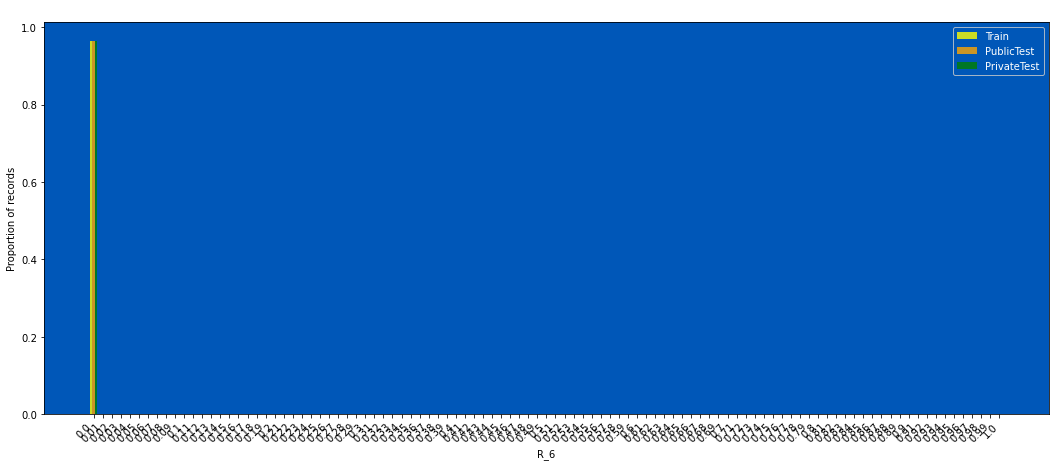

In [45]:
plot_train_test_distribution(df_list, "R_6", nunique_thr=5000)

### R_7

1 null count, 0.000 null proportion
1.0000 of the targets have label = 1


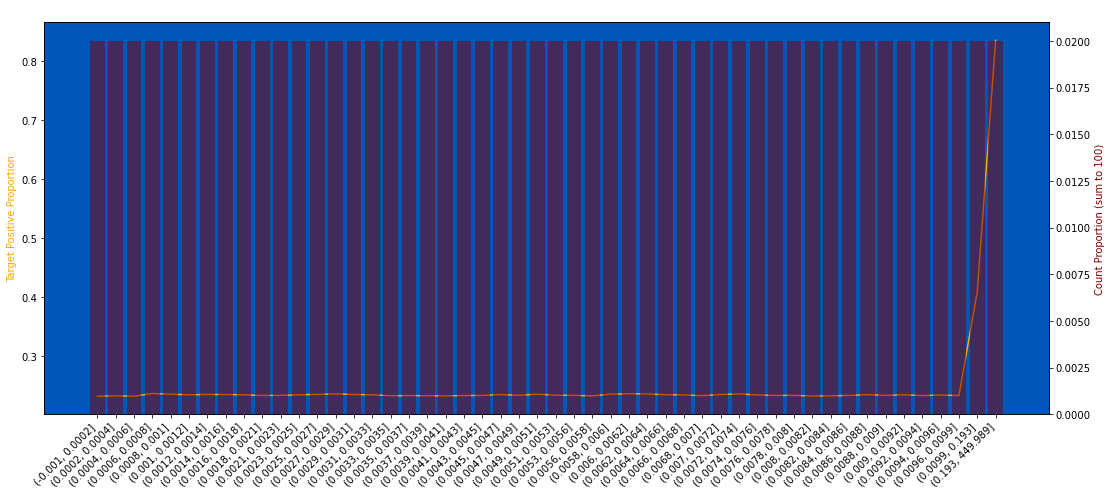

In [46]:
plot_target_check(train, "R_7", q=50, use_raw_bin=True, nunique_thr=200, strfy_x=True)

In [47]:
%%time
df_list = round_dfs(df_list, col="R_7", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 271 ms, sys: 921 ms, total: 1.19 s
Wall time: 2.12 s


1 null count, 0.000 null proportion
1.0000 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


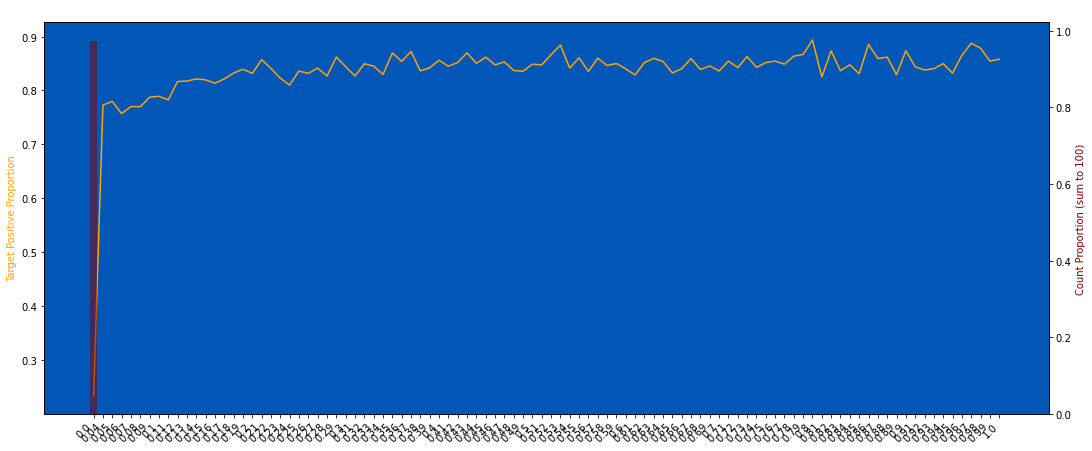

In [48]:
plot_target_check(train, "R_7", q=50, use_raw_bin=True, nunique_thr=20000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


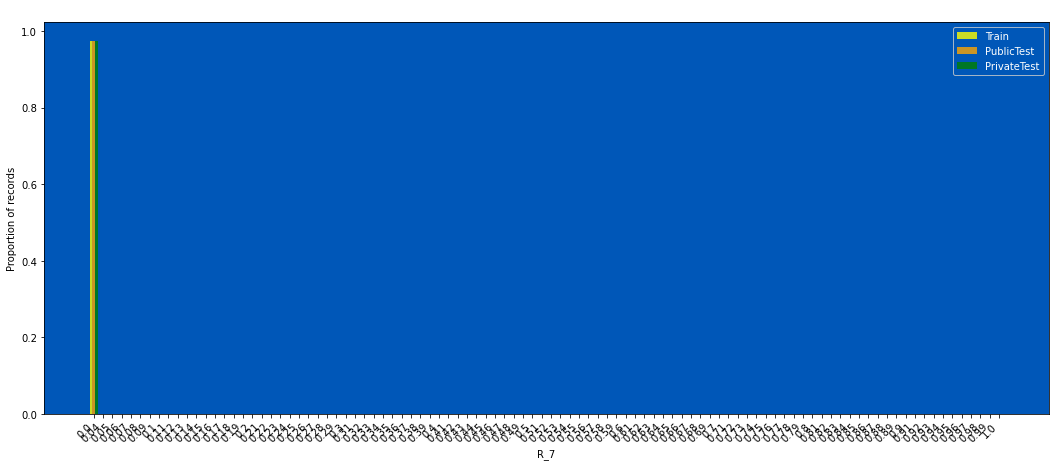

In [49]:
plot_train_test_distribution(df_list, "R_7", nunique_thr=20000)

### R_8

0 null count, 0.000 null proportion
nan of the targets have label = 1


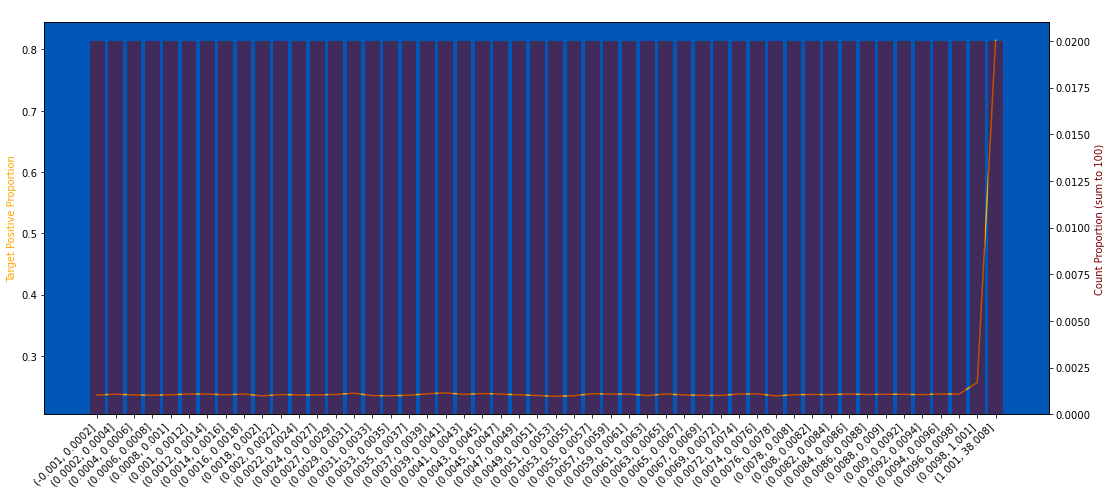

In [50]:
plot_target_check(train, "R_8", q=50, use_raw_bin=True)

In [51]:
%%time
df_list = round_dfs(df_list, col="R_8", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 271 ms, sys: 1 s, total: 1.27 s
Wall time: 2.2 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


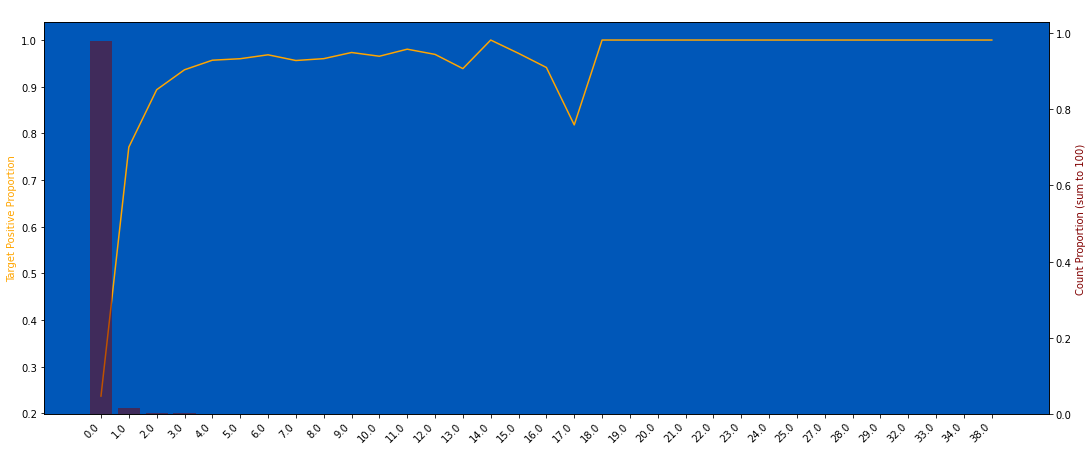

In [52]:
plot_target_check(train, "R_8", q=50, use_raw_bin=True, nunique_thr=30000, strfy_x=True, without_drop_tail=True)

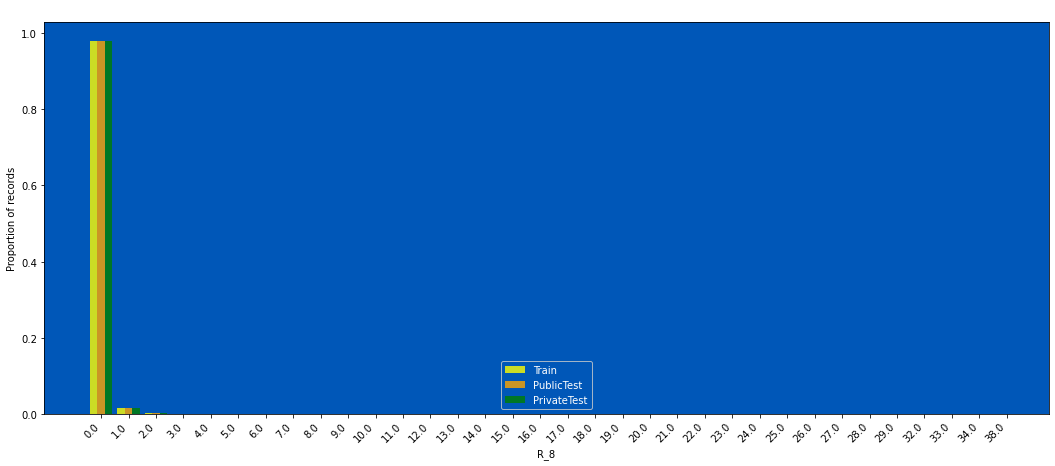

In [53]:
plot_train_test_distribution(df_list, "R_8", nunique_thr=100, without_drop_tail=True)

### R_9

5218918 null count, 0.943 null proportion
0.2293 of the targets have label = 1


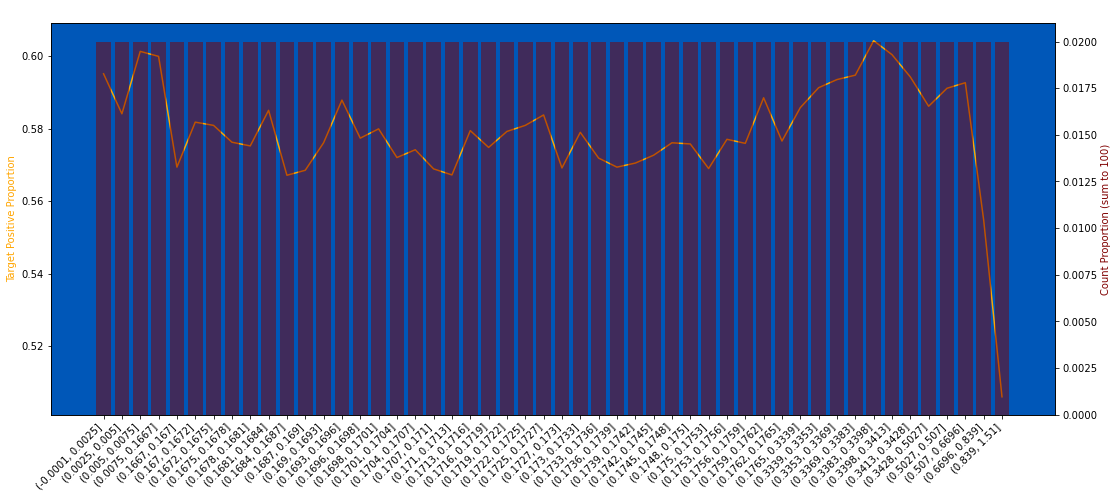

In [54]:
plot_target_check(train, "R_9", q=50, use_raw_bin=True)

In [55]:
%%time
df_list = round_dfs(df_list, col="R_9", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 241 ms, sys: 920 ms, total: 1.16 s
Wall time: 2.26 s


5218918 null count, 0.943 null proportion
0.2293 of the targets have label = 1


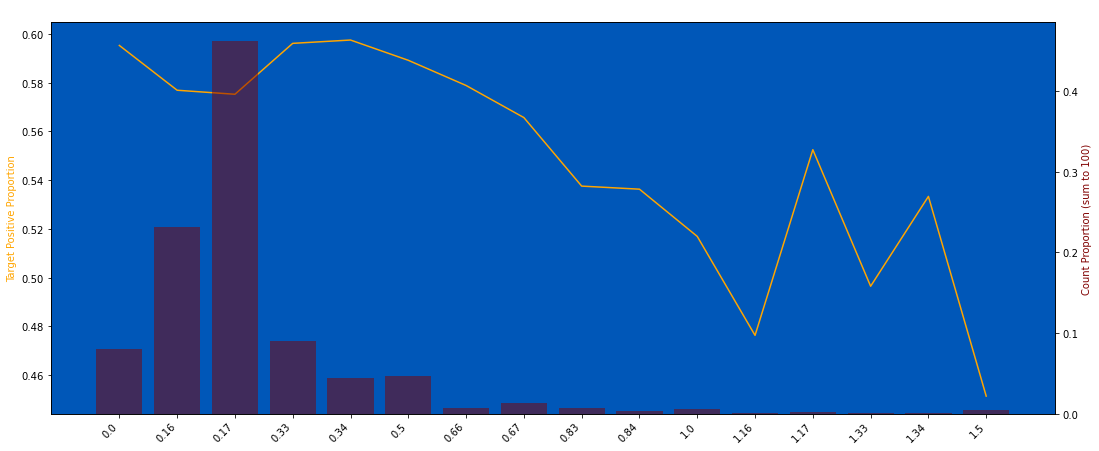

In [56]:
plot_target_check(train, "R_9", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

In [57]:
for df in df_list:
    df["R_9_"] = (df["R_9"] / 0.167).round(0)

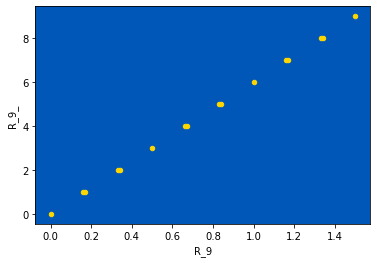

In [58]:
check_binning(train, "R_9", end=100000)

In [59]:
for df in df_list:
    df["R_9"] = (df["R_9"] / 0.167).round(0)

5218918 null count, 0.943 null proportion
0.2293 of the targets have label = 1


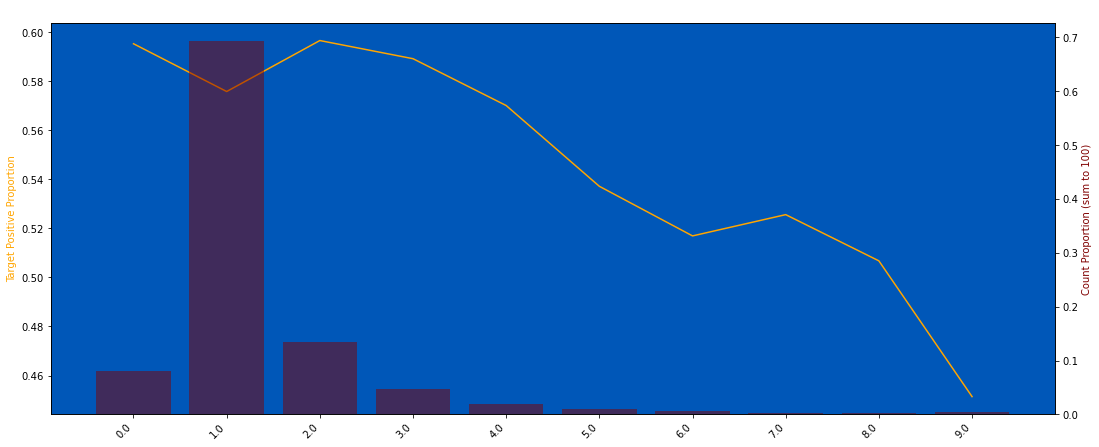

In [60]:
plot_target_check(train, "R_9", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

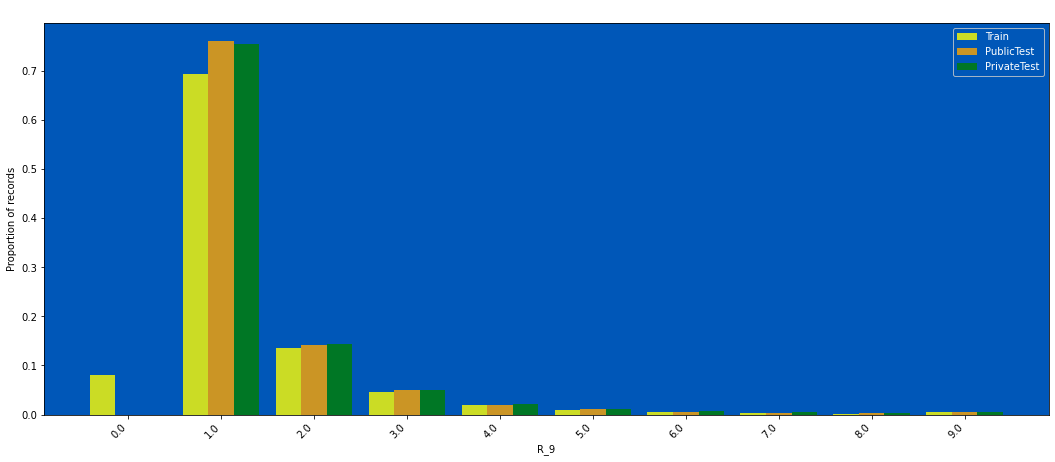

In [61]:
plot_train_test_distribution(df_list, "R_9", nunique_thr=100, without_drop_tail=True)

In [62]:
%%time
for df in df_list:
    df = df.drop(columns="R_9", errors="ignore")

CPU times: user 1.25 s, sys: 1.73 s, total: 2.97 s
Wall time: 3.25 s


### R_10

0 null count, 0.000 null proportion
nan of the targets have label = 1


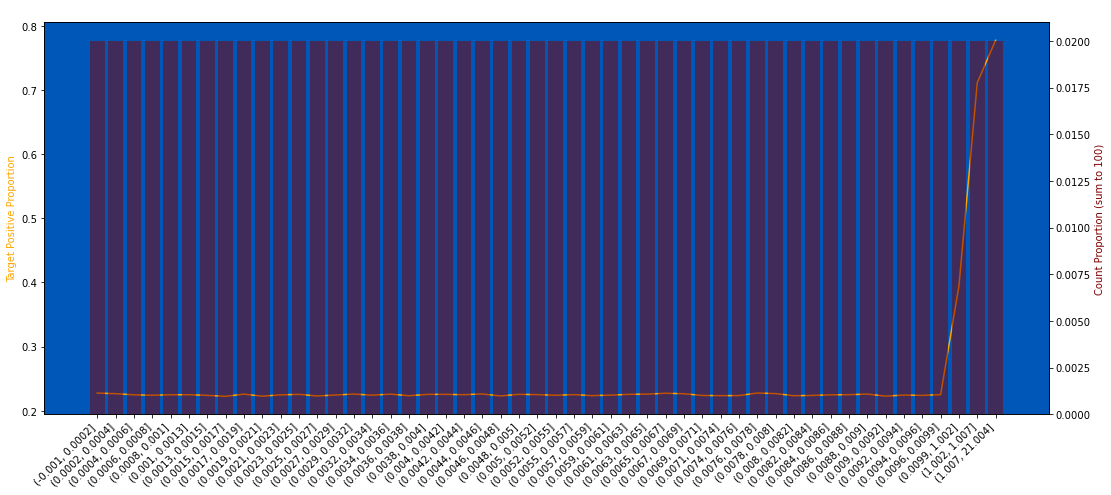

In [63]:
plot_target_check(train, "R_10", q=50, use_raw_bin=True)

In [64]:
%%time
df_list = round_dfs(df_list, col="R_10", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 279 ms, sys: 1.05 s, total: 1.32 s
Wall time: 2.26 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


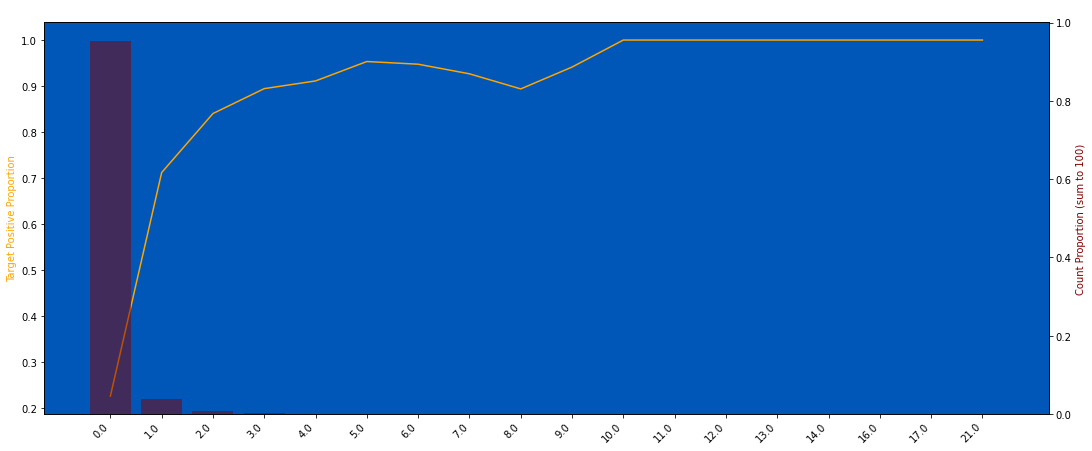

In [65]:
plot_target_check(train, "R_10", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

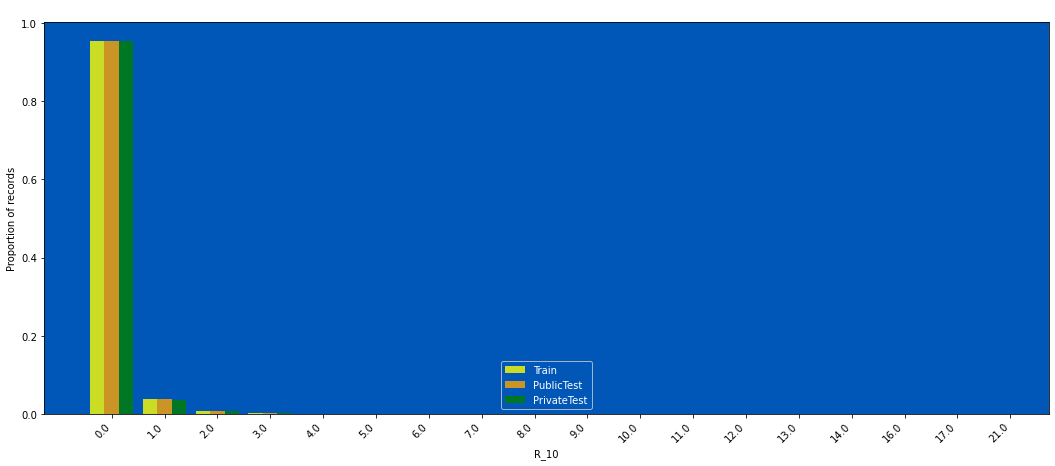

In [66]:
plot_train_test_distribution(df_list, "R_10", nunique_thr=100, without_drop_tail=True)

### R_11

0 null count, 0.000 null proportion
nan of the targets have label = 1


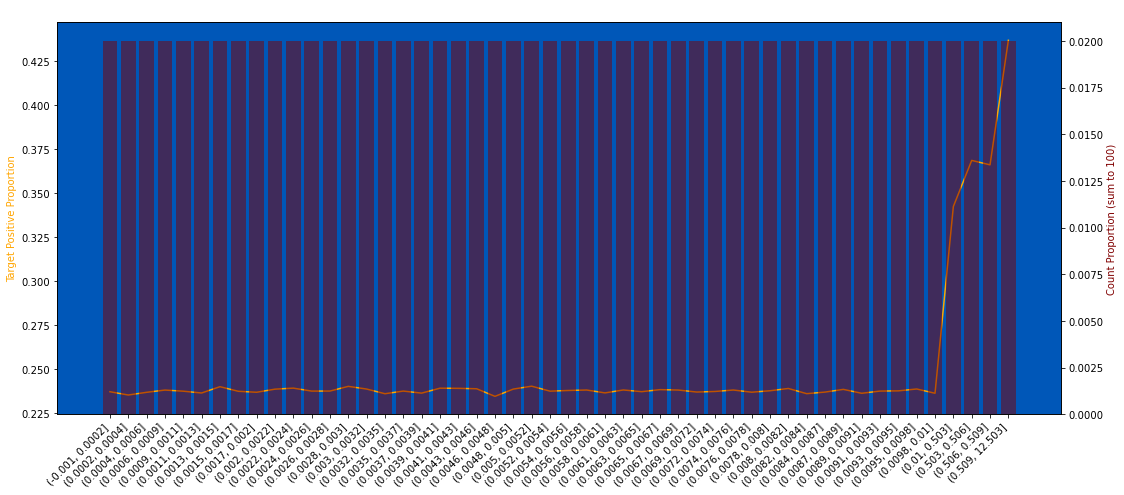

In [67]:
plot_target_check(train, "R_11", q=50, use_raw_bin=True)

In [68]:
%%time
df_list = round_dfs(df_list, col="R_11", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 276 ms, sys: 1.04 s, total: 1.32 s
Wall time: 2.25 s


In [69]:
for df in df_list:
    df["R_11_"] = (df["R_11"] * 2).round(0)

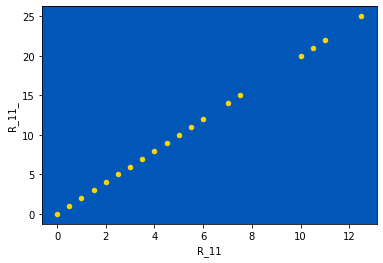

In [70]:
check_binning(train, "R_11", end=200000)

In [71]:
for df in df_list:
    df["R_11"] = (df["R_11"] * 2).round(0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


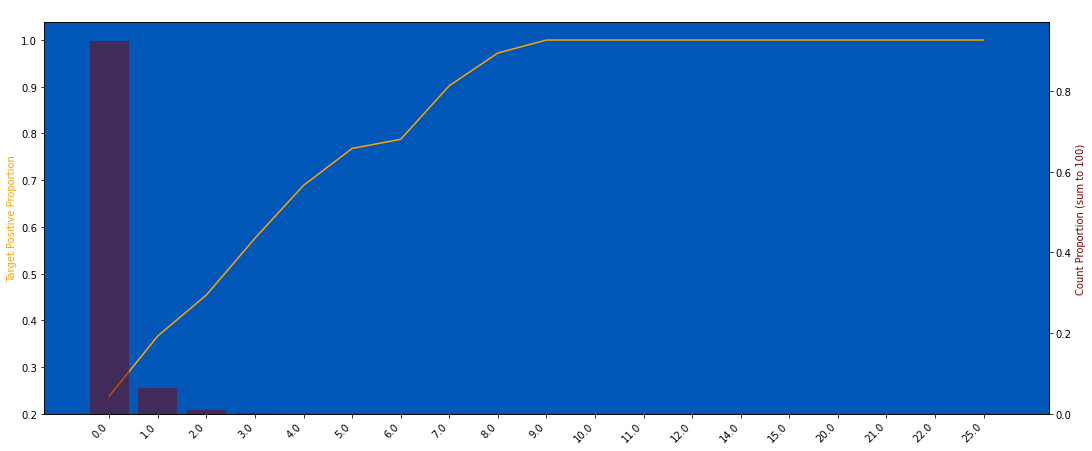

In [72]:
plot_target_check(train, "R_11", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

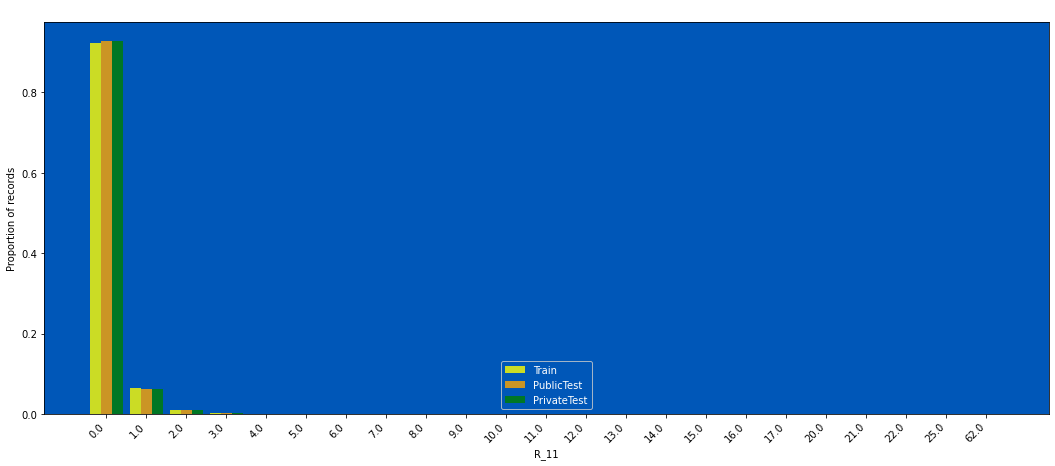

In [73]:
plot_train_test_distribution(df_list, "R_11", nunique_thr=100, without_drop_tail=True)

### R_12

56 null count, 0.000 null proportion
0.2500 of the targets have label = 1


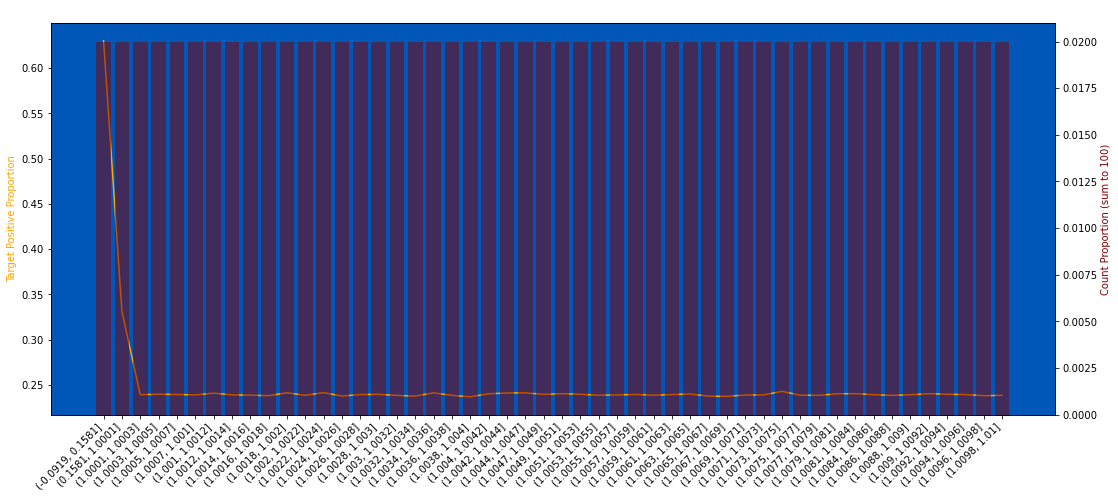

In [74]:
plot_target_check(train, "R_12", q=50, use_raw_bin=True, strfy_x=True, nunique_thr=1000)

In [75]:
%%time
df_list = round_dfs(df_list, col="R_12", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 274 ms, sys: 1.03 s, total: 1.3 s
Wall time: 2.23 s


56 null count, 0.000 null proportion
0.2500 of the targets have label = 1


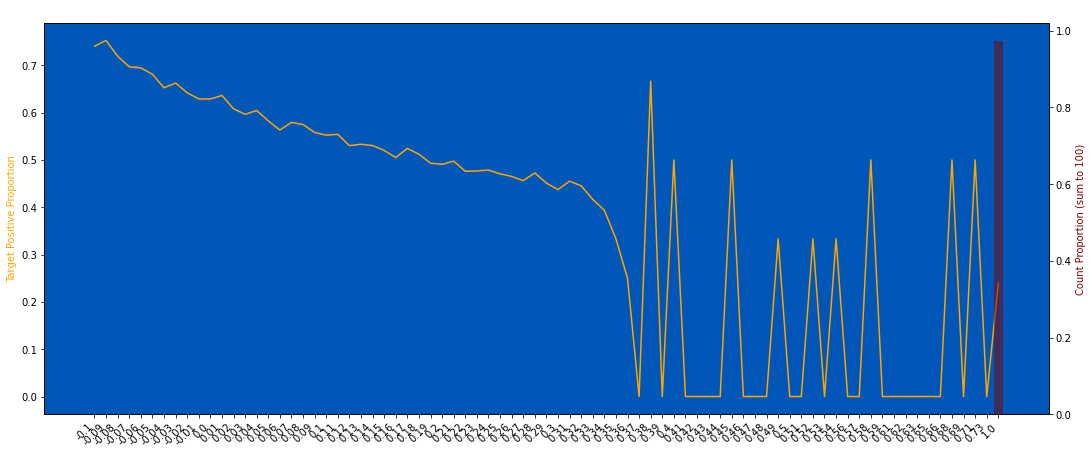

In [76]:
plot_target_check(train, "R_12", q=50, use_raw_bin=True, strfy_x=True, nunique_thr=1000, without_drop_tail=True)

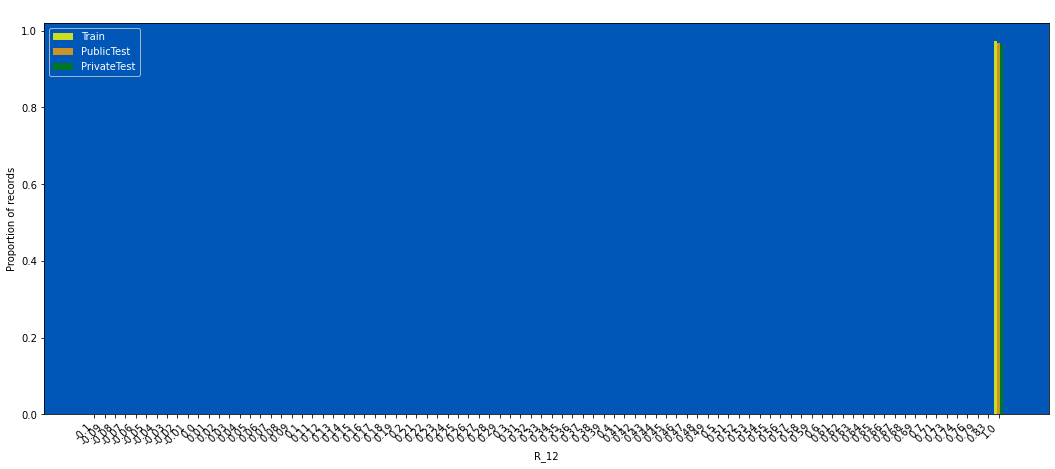

In [77]:
plot_train_test_distribution(df_list, "R_12", nunique_thr=100, without_drop_tail=True)

### R_13

0 null count, 0.000 null proportion
nan of the targets have label = 1


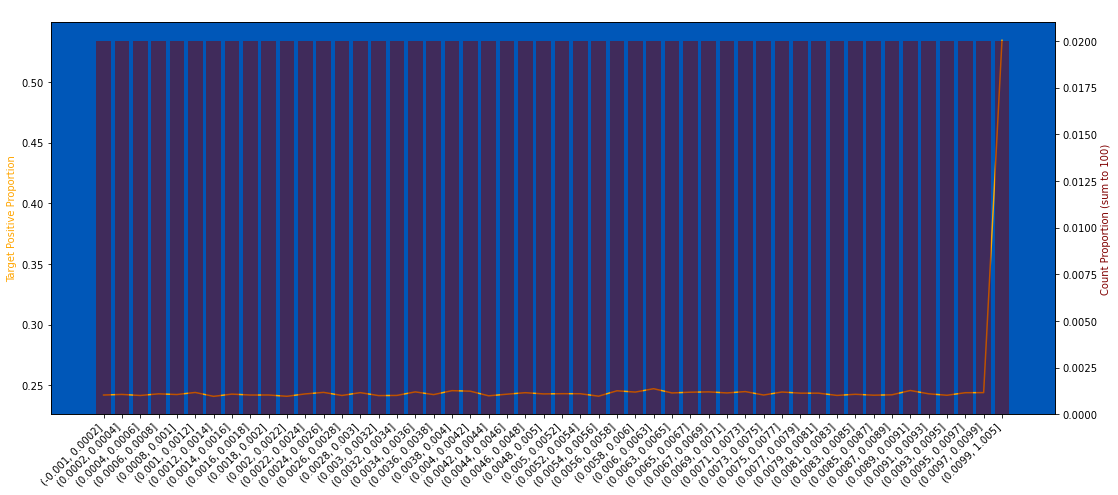

In [78]:
plot_target_check(train, "R_13", q=50, use_raw_bin=True, nunique_thr=29, strfy_x=True)

In [79]:
%%time
df_list = round_dfs(df_list, col="R_13", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 277 ms, sys: 1.03 s, total: 1.3 s
Wall time: 2.24 s


In [80]:
for df in df_list:
    df["R_13"] = np.where(df["R_13"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


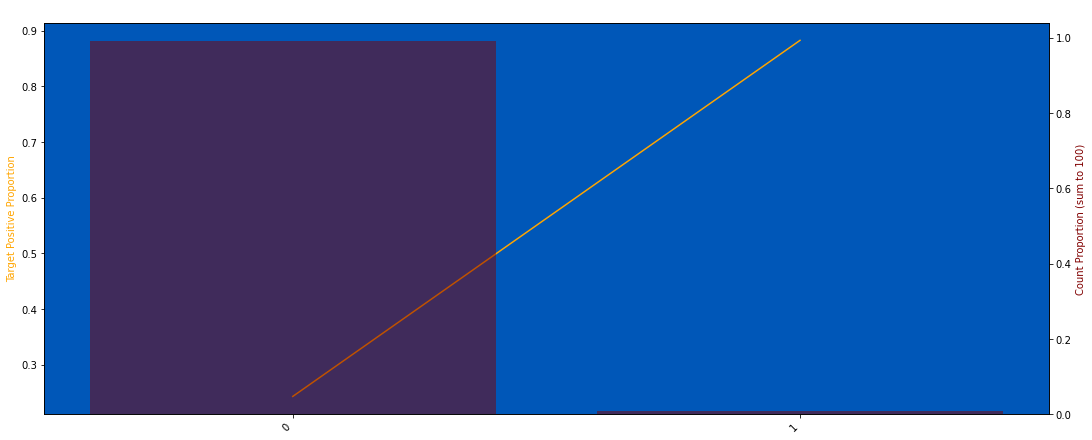

In [81]:
plot_target_check(train, "R_13", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

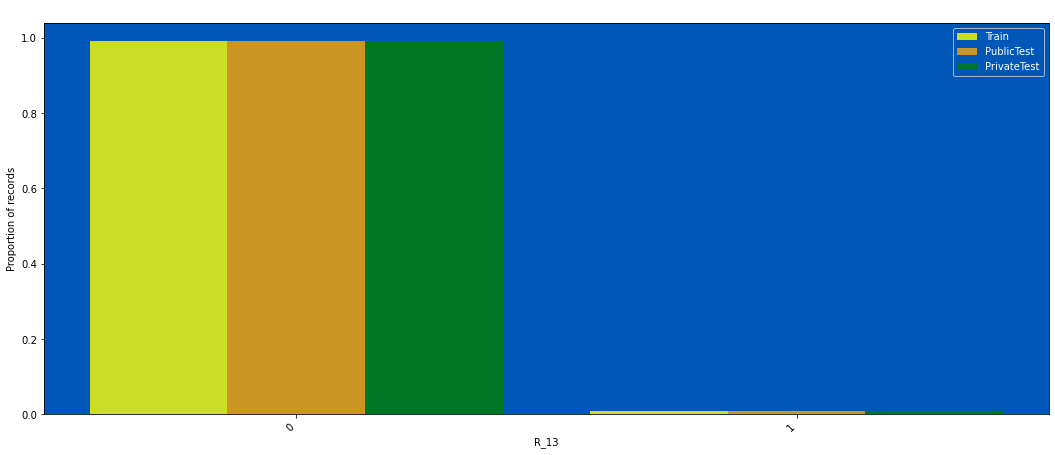

In [82]:
plot_train_test_distribution(df_list, "R_13", nunique_thr=100, without_drop_tail=True)

### R_14

1 null count, 0.000 null proportion
1.0000 of the targets have label = 1


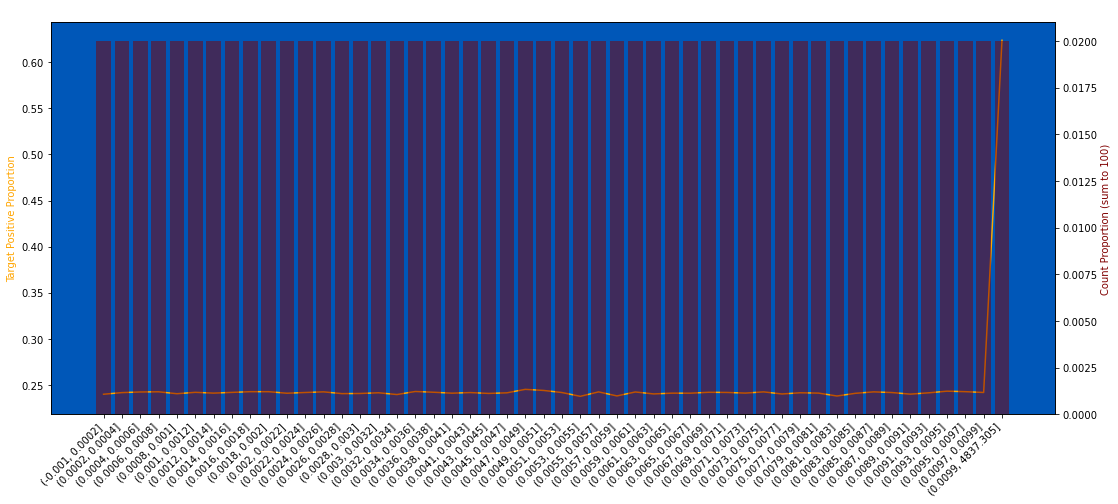

In [83]:
plot_target_check(train, "R_14", q=50, use_raw_bin=True)

In [84]:
%%time
df_list = round_dfs(df_list, col="R_14", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 277 ms, sys: 1.04 s, total: 1.31 s
Wall time: 2.25 s


1 null count, 0.000 null proportion
1.0000 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


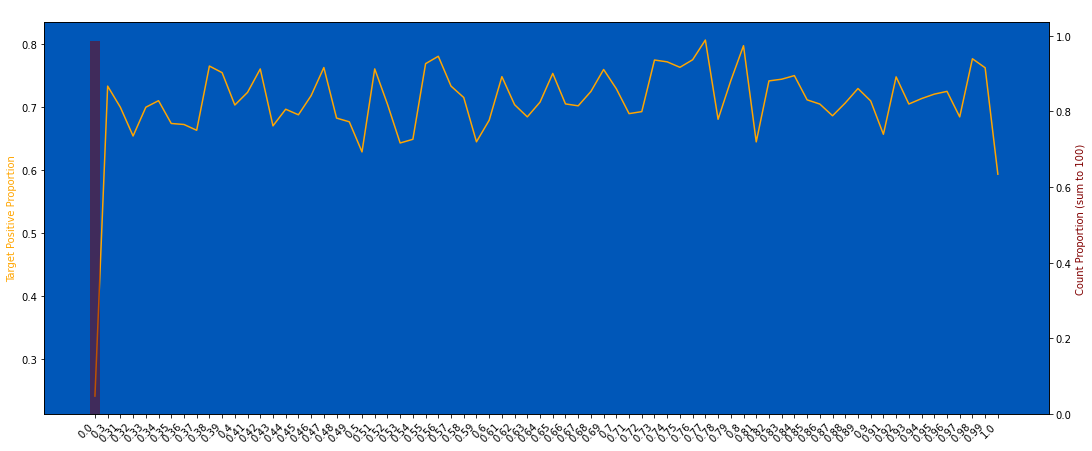

In [85]:
plot_target_check(train, "R_14", q=50, use_raw_bin=True, nunique_thr=50000, strfy_x=True)

In [86]:
for df in df_list:
    df["R_14"] = np.where(df["R_14"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


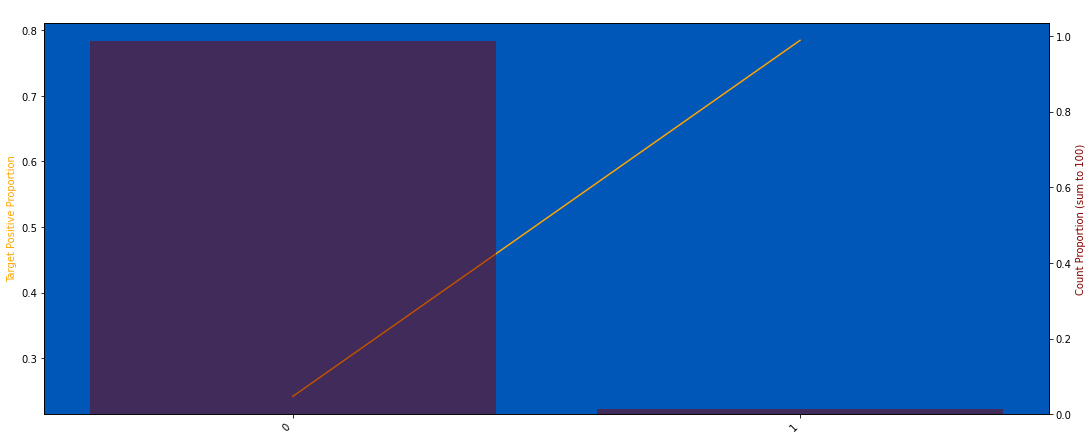

In [87]:
plot_target_check(train, "R_14", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

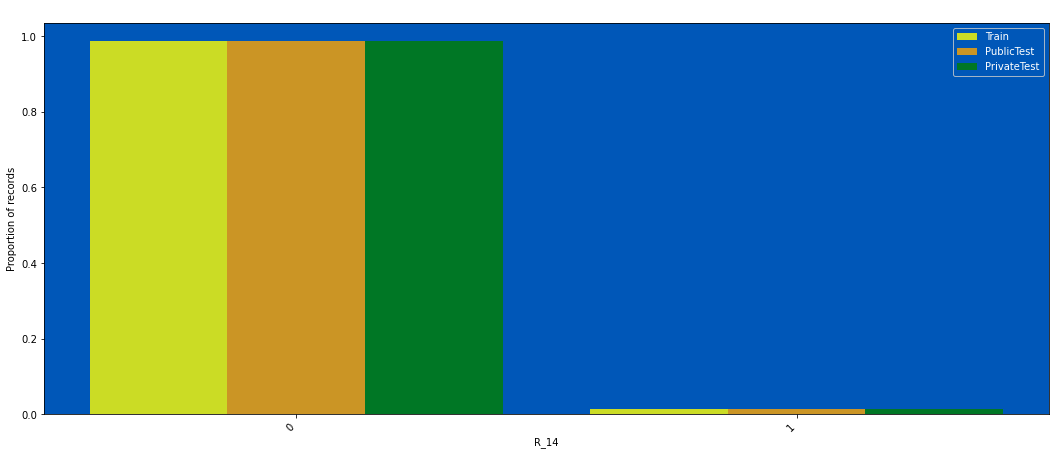

In [88]:
plot_train_test_distribution(df_list, "R_14", nunique_thr=50000, without_drop_tail=True)

### R_15

0 null count, 0.000 null proportion
nan of the targets have label = 1


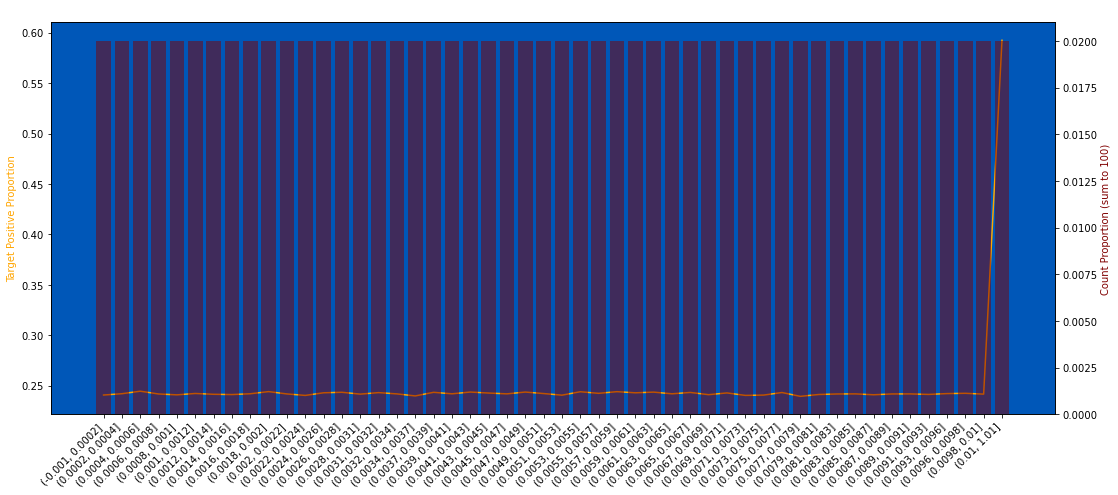

In [89]:
plot_target_check(train, "R_15", q=50, use_raw_bin=True)

In [90]:
%%time
df_list = round_dfs(df_list, col="R_15", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 272 ms, sys: 1.03 s, total: 1.3 s
Wall time: 2.24 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


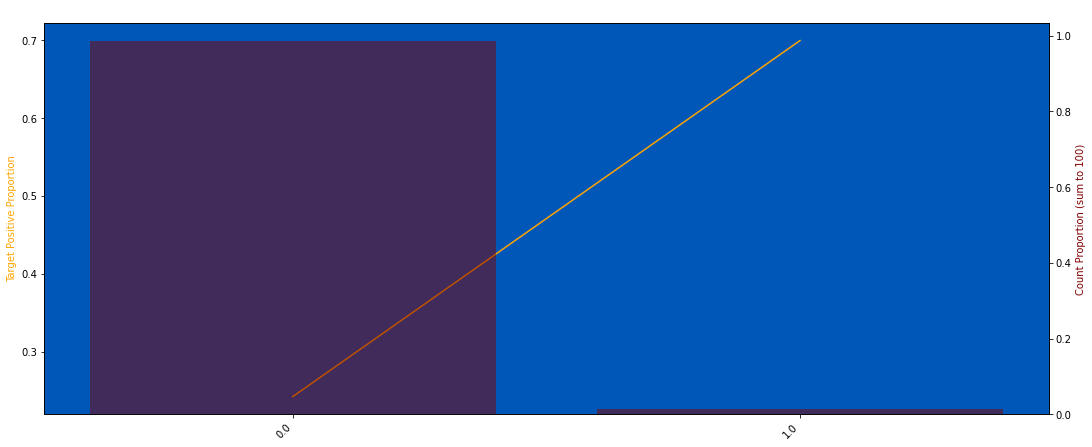

In [91]:
plot_target_check(train, "R_15", q=50, use_raw_bin=True, nunique_thr=5, strfy_x=True)

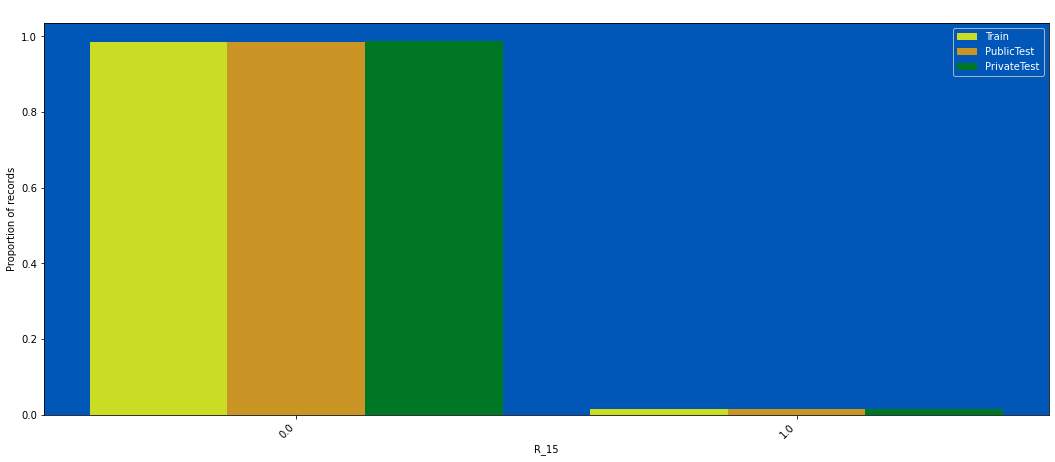

In [92]:
plot_train_test_distribution(df_list, "R_15", nunique_thr=50000, without_drop_tail=True)

### R_16

0 null count, 0.000 null proportion
nan of the targets have label = 1


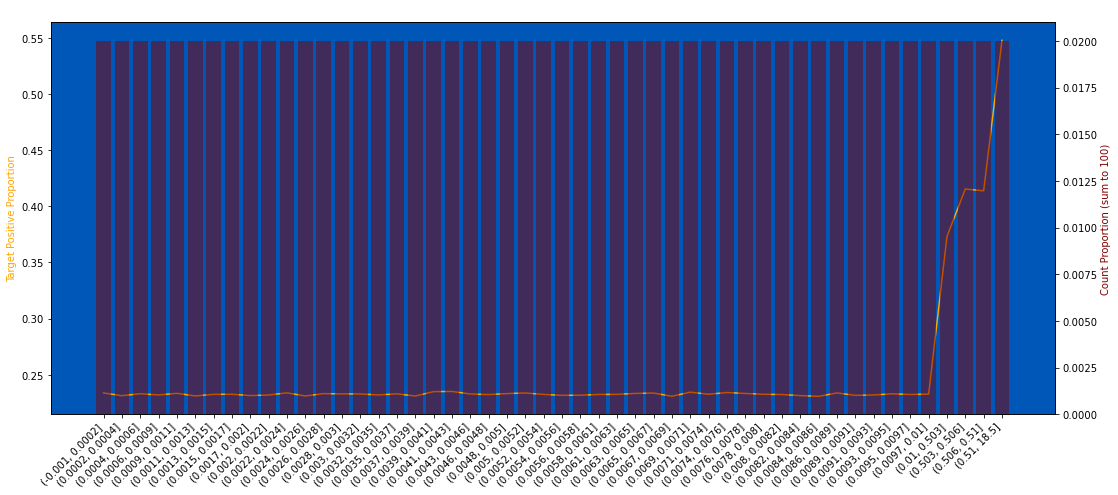

In [93]:
plot_target_check(train, "R_16", q=50, use_raw_bin=True)

In [94]:
%%time
df_list = round_dfs(df_list, col="R_16", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 262 ms, sys: 1.05 s, total: 1.32 s
Wall time: 2.25 s


In [95]:
for df in df_list:
    df["R_16"] *= 2

0 null count, 0.000 null proportion
nan of the targets have label = 1


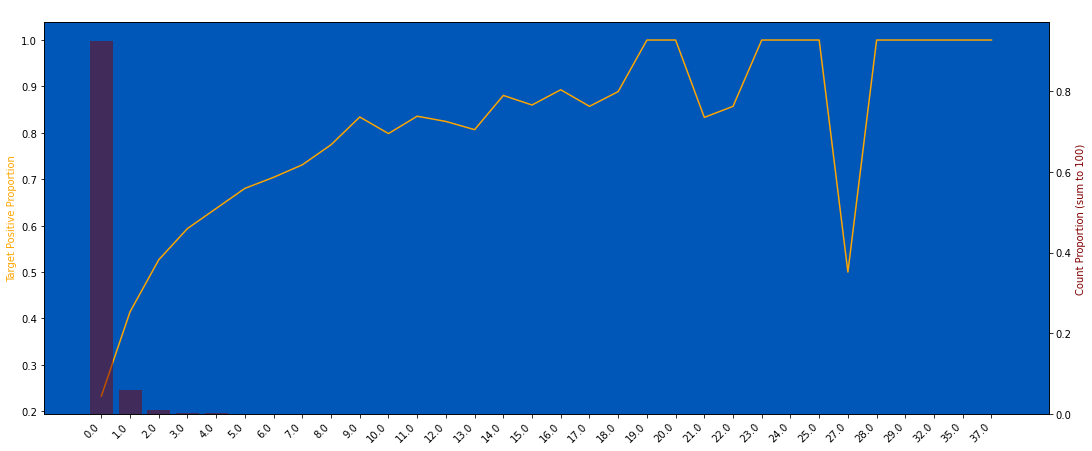

In [96]:
plot_target_check(train, "R_16", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

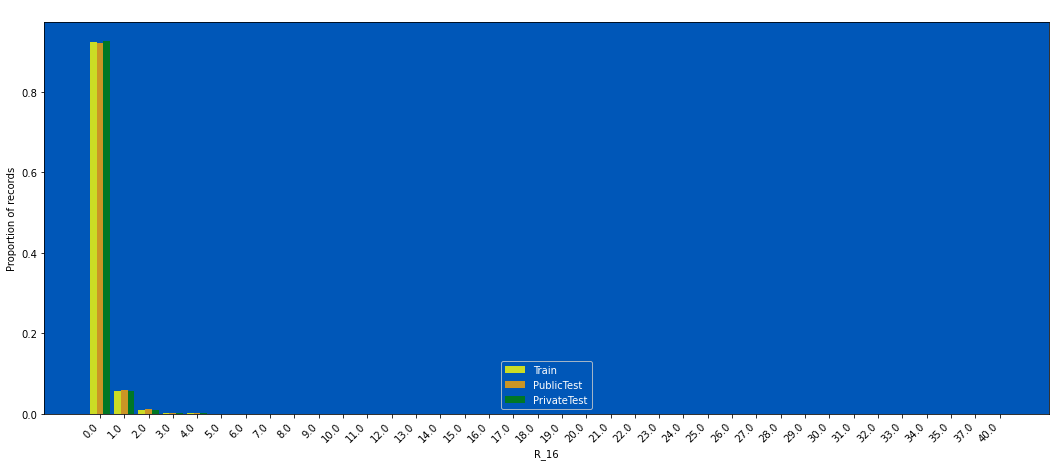

In [97]:
plot_train_test_distribution(df_list, "R_16", nunique_thr=50000, without_drop_tail=True)

### R_17

0 null count, 0.000 null proportion
nan of the targets have label = 1


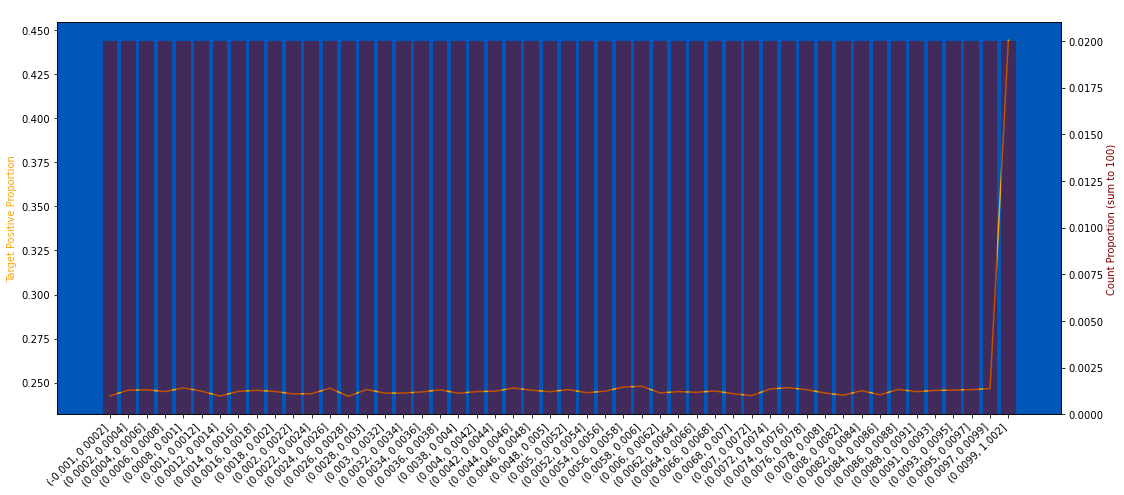

In [98]:
plot_target_check(train, "R_17", q=50, use_raw_bin=True, nunique_thr=26)

In [99]:
%%time
df_list = round_dfs(df_list, col="R_17", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 259 ms, sys: 1.04 s, total: 1.3 s
Wall time: 2.25 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


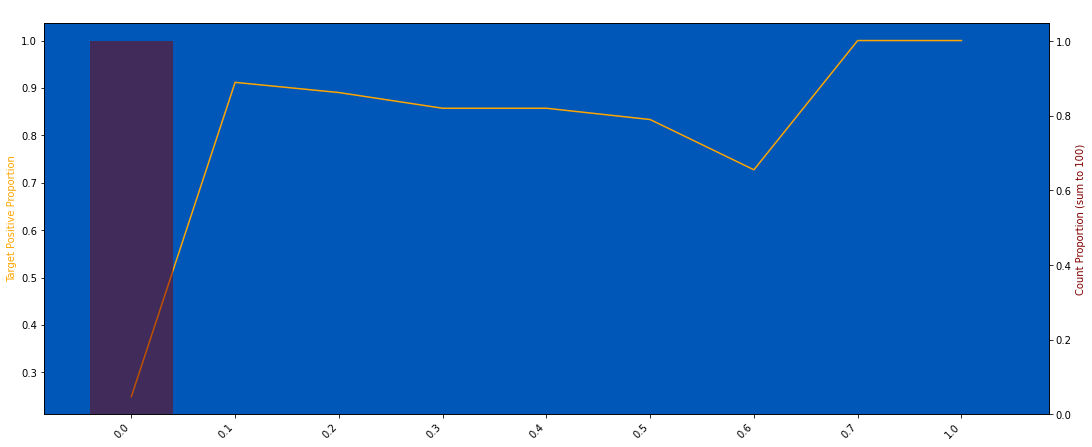

In [100]:
plot_target_check(train, "R_17", q=50, use_raw_bin=True, nunique_thr=100, strfy_x=True, without_drop_tail=True)

In [101]:
for df in df_list:
    df["R_17"] = np.where(df["R_17"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


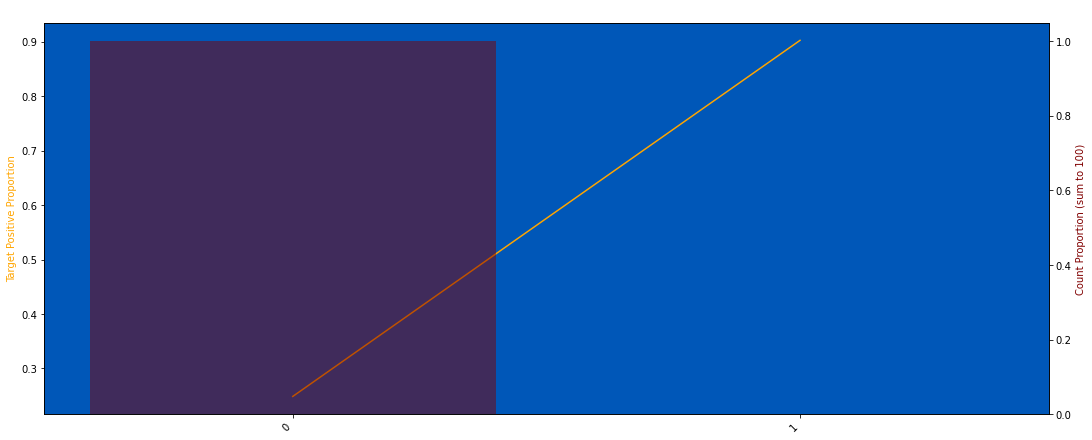

In [102]:
plot_target_check(train, "R_17", q=50, use_raw_bin=True, nunique_thr=100, strfy_x=True, without_drop_tail=True)

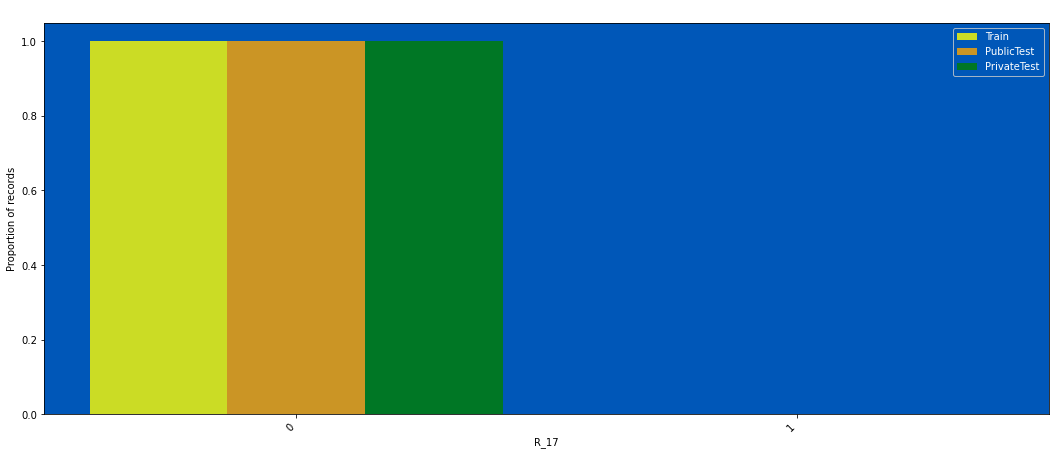

In [103]:
plot_train_test_distribution(df_list, "R_17", nunique_thr=50000, without_drop_tail=True)

### R_18

0 null count, 0.000 null proportion
nan of the targets have label = 1


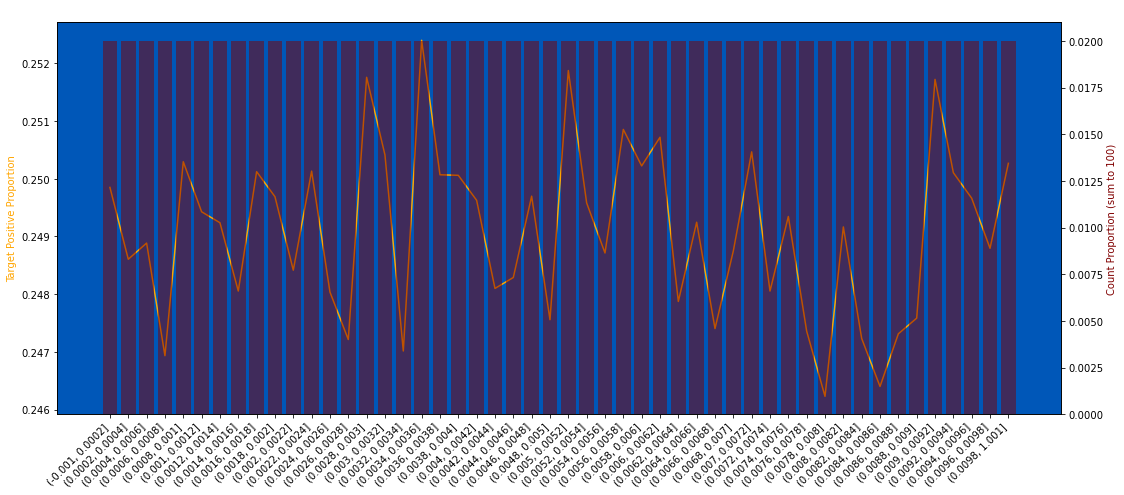

In [104]:
plot_target_check(train, "R_18", q=50, use_raw_bin=True)

In [105]:
%%time
df_list = round_dfs(df_list, col="R_18", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 261 ms, sys: 1.1 s, total: 1.36 s
Wall time: 2.31 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


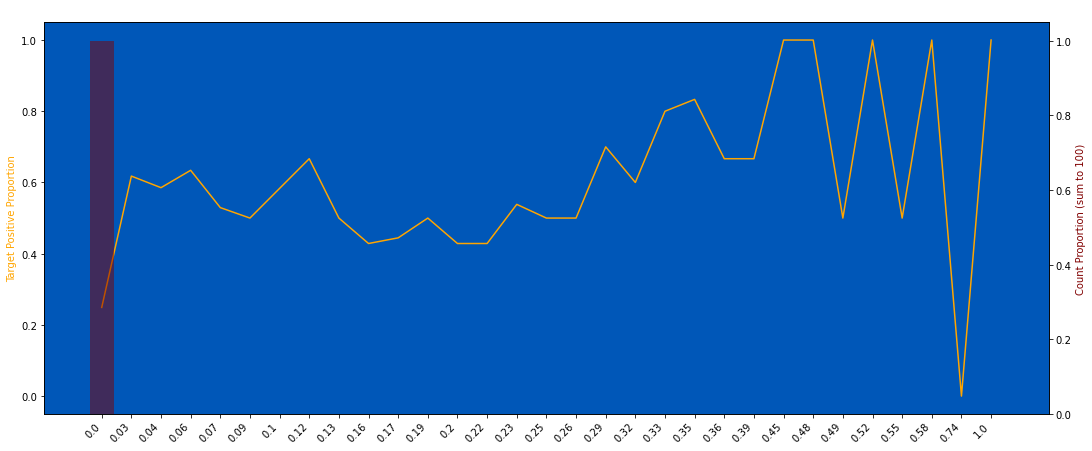

In [106]:
plot_target_check(train, "R_18", q=50, use_raw_bin=True, strfy_x=True, nunique_thr=300, without_drop_tail=True)

In [107]:
for df in df_list:
    df["R_18"] = np.where(df["R_18"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


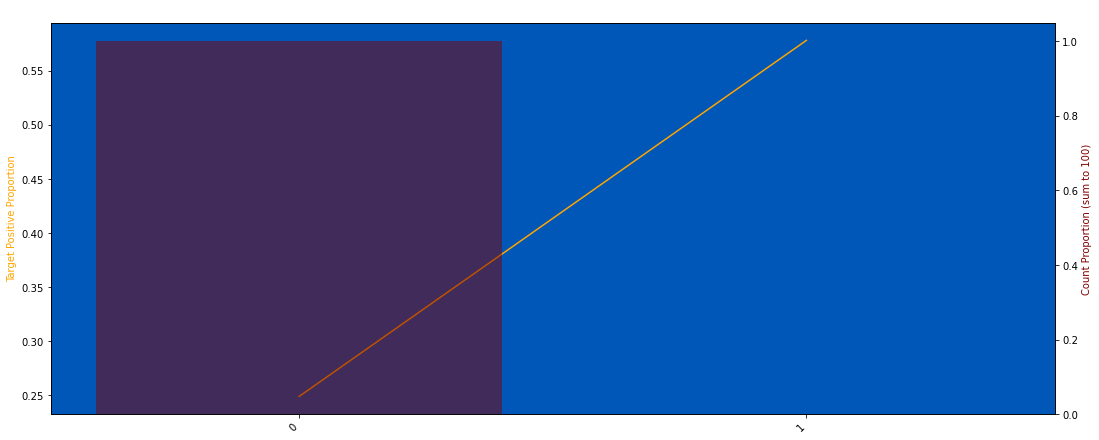

In [108]:
plot_target_check(train, "R_18", q=50, use_raw_bin=True, nunique_thr=100, strfy_x=True, without_drop_tail=True)

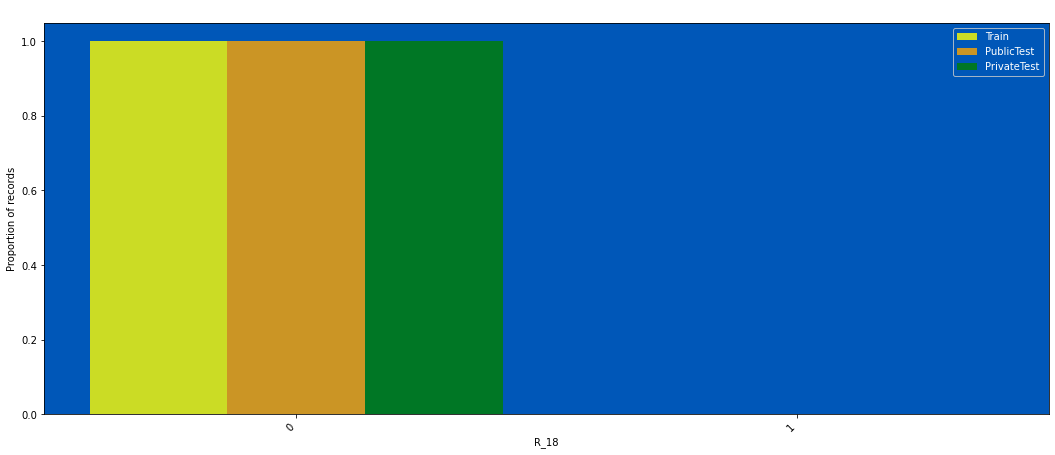

In [109]:
plot_train_test_distribution(df_list, "R_18", nunique_thr=50000, without_drop_tail=True)

### R_19

0 null count, 0.000 null proportion
nan of the targets have label = 1


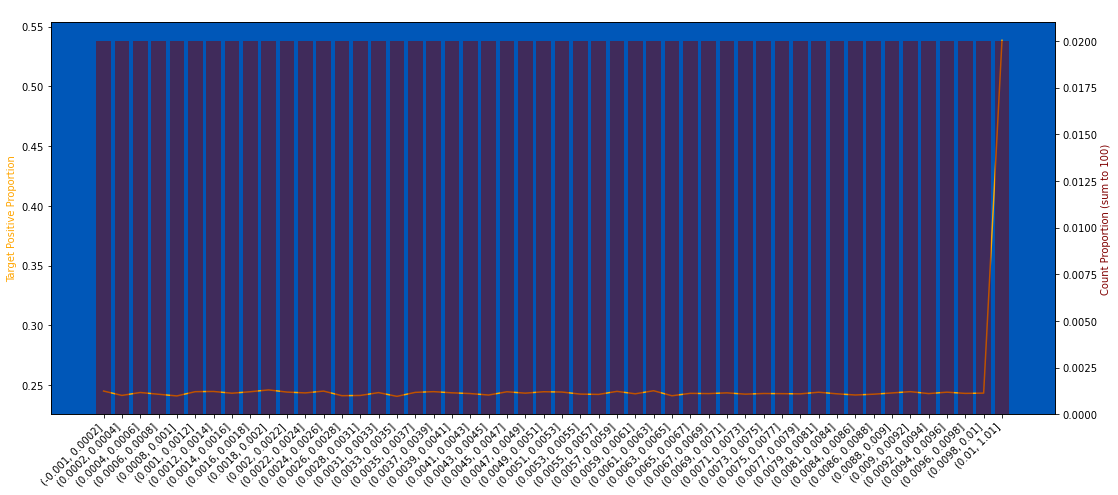

In [110]:
plot_target_check(train, "R_19", q=50, use_raw_bin=True, nunique_thr=20)

In [111]:
%%time
df_list = round_dfs(df_list, col="R_19", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 253 ms, sys: 1.07 s, total: 1.32 s
Wall time: 2.27 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


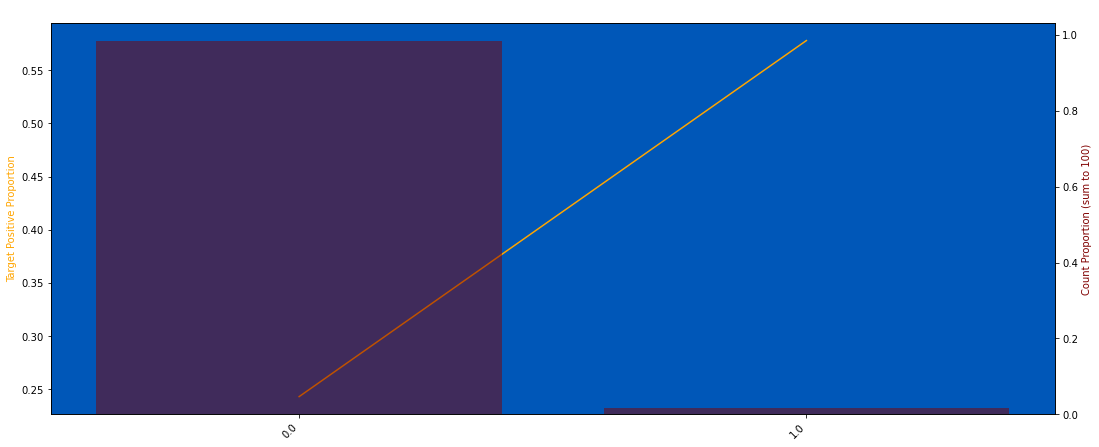

In [112]:
plot_target_check(train, "R_19", q=50, use_raw_bin=True, nunique_thr=4, strfy_x=True, without_drop_tail=True)

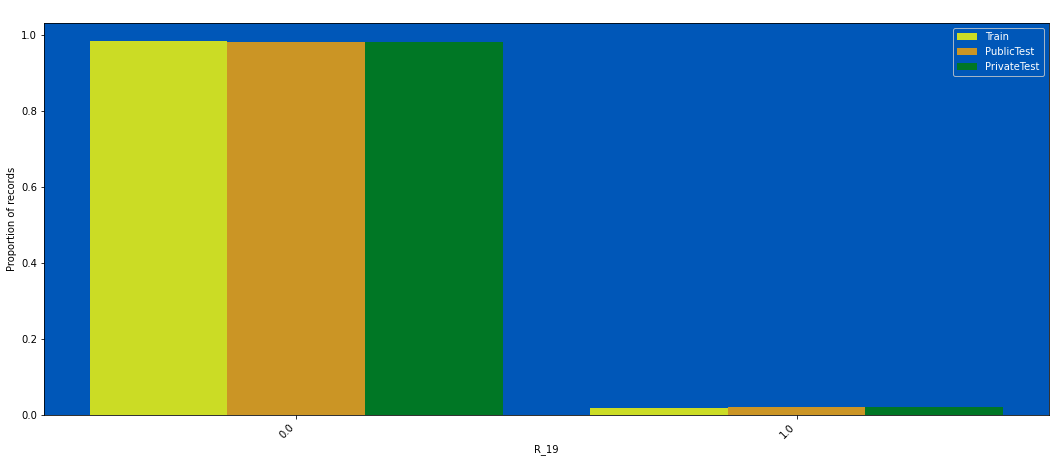

In [113]:
plot_train_test_distribution(df_list, "R_19", nunique_thr=500, without_drop_tail=True)

### R_20

75 null count, 0.000 null proportion
0.2667 of the targets have label = 1


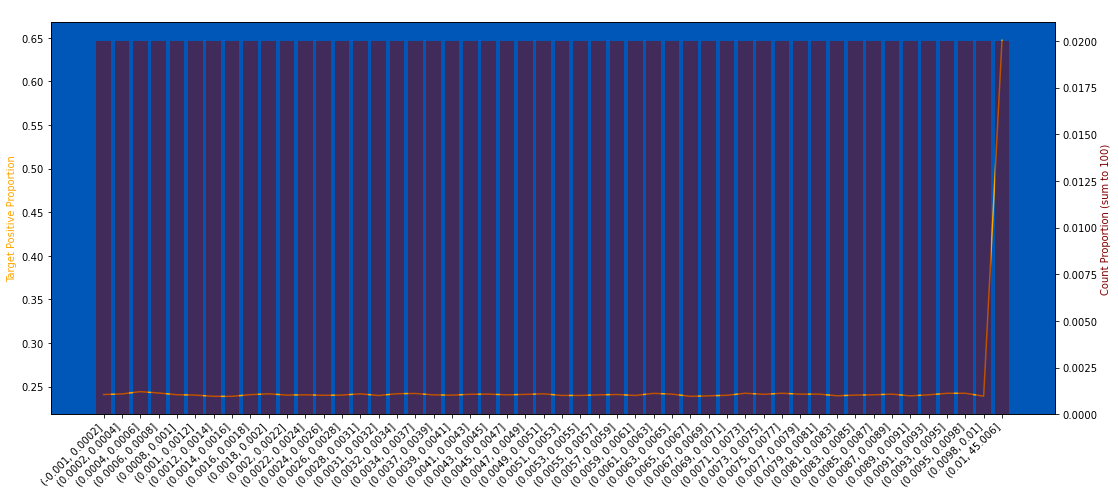

In [114]:
plot_target_check(train, "R_20", q=50, use_raw_bin=True)

In [115]:
%%time
df_list = round_dfs(df_list, col="R_20", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 257 ms, sys: 1.04 s, total: 1.3 s
Wall time: 2.26 s


In [116]:
for df in df_list:
    df["R_20"] = np.where(df["R_20"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


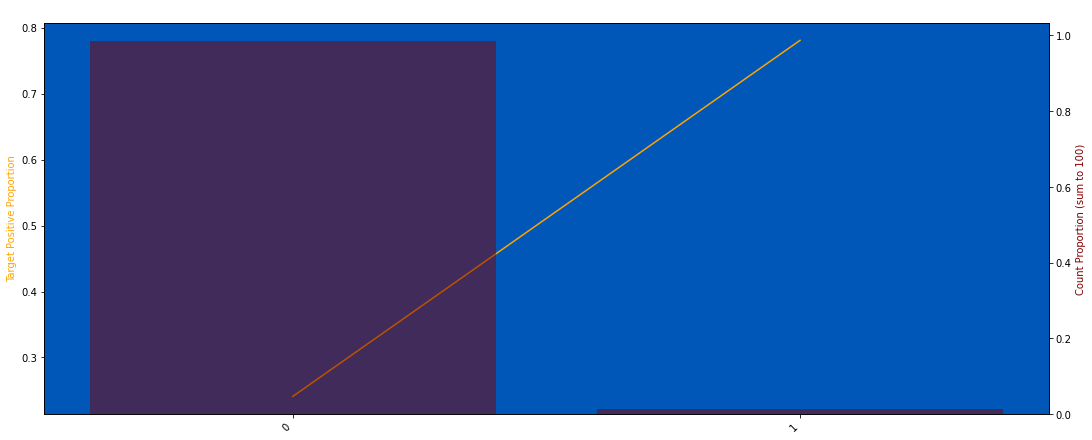

In [117]:
plot_target_check(train, "R_20", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

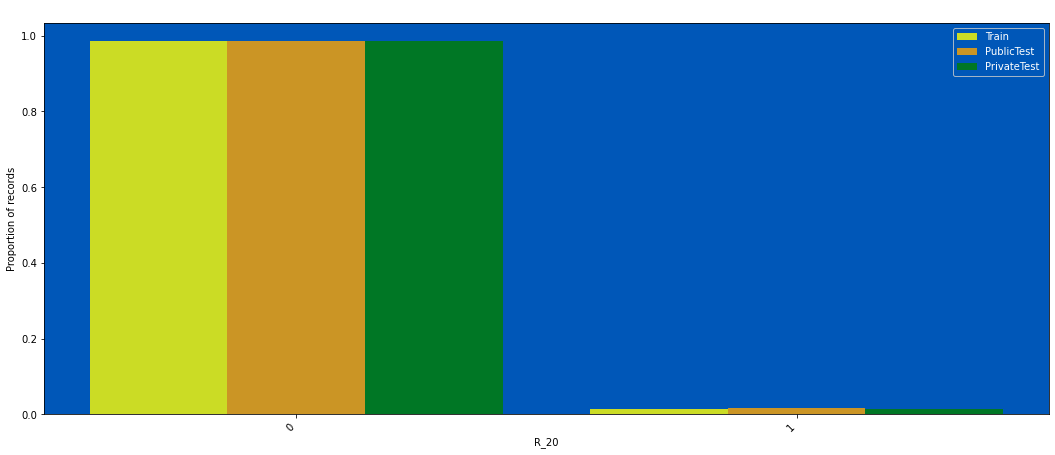

In [118]:
plot_train_test_distribution(df_list, "R_20", nunique_thr=500, without_drop_tail=True)

### R_21

0 null count, 0.000 null proportion
nan of the targets have label = 1


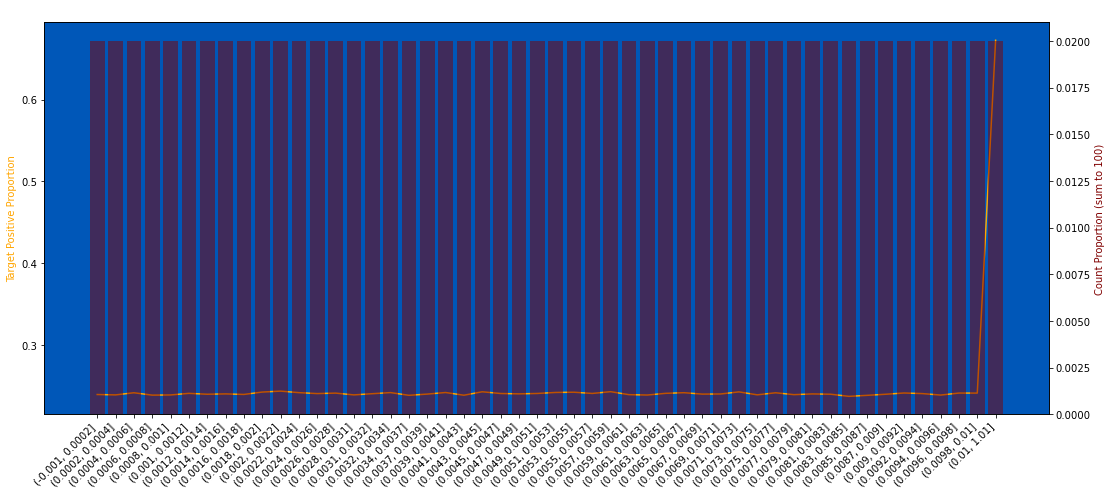

In [119]:
plot_target_check(train, "R_21", q=50, use_raw_bin=True)

In [120]:
%%time
df_list = round_dfs(df_list, col="R_21", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 277 ms, sys: 1.13 s, total: 1.41 s
Wall time: 2.38 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


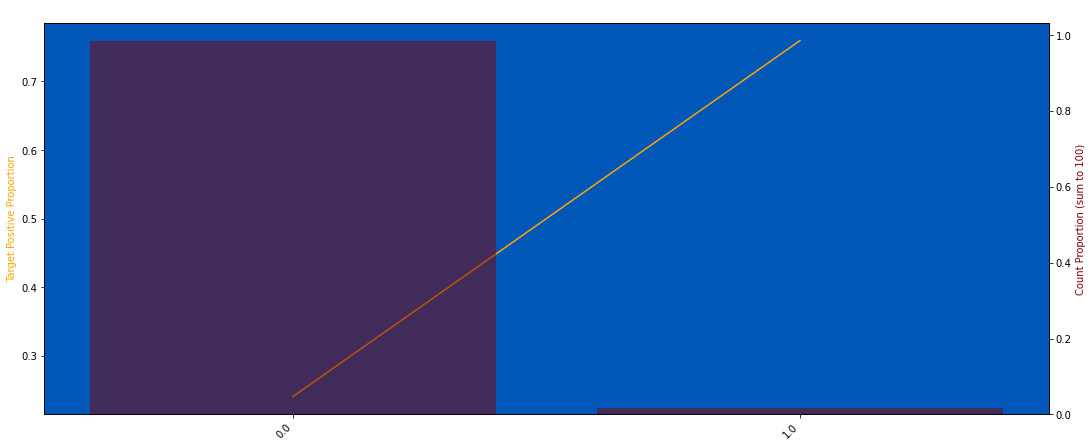

In [121]:
plot_target_check(train, "R_21", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

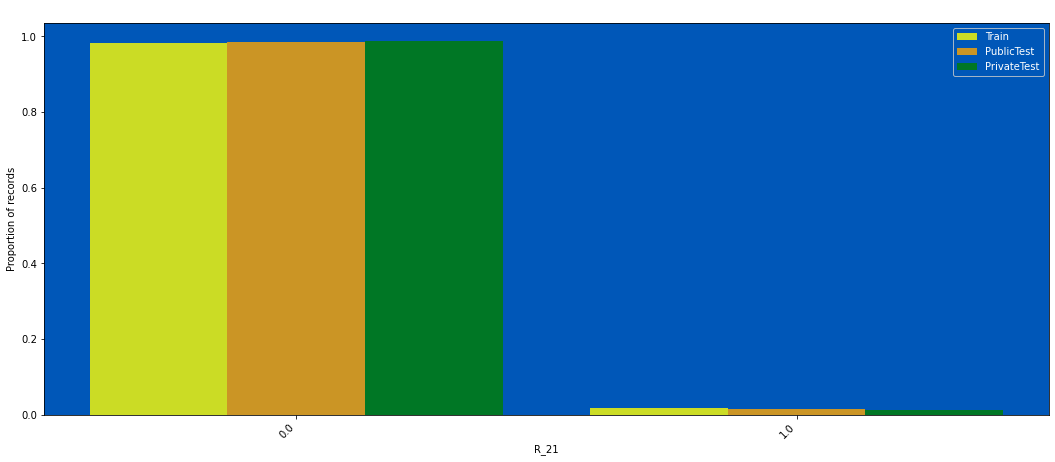

In [122]:
plot_train_test_distribution(df_list, "R_21", nunique_thr=500, without_drop_tail=True)

### R_22

0 null count, 0.000 null proportion
nan of the targets have label = 1


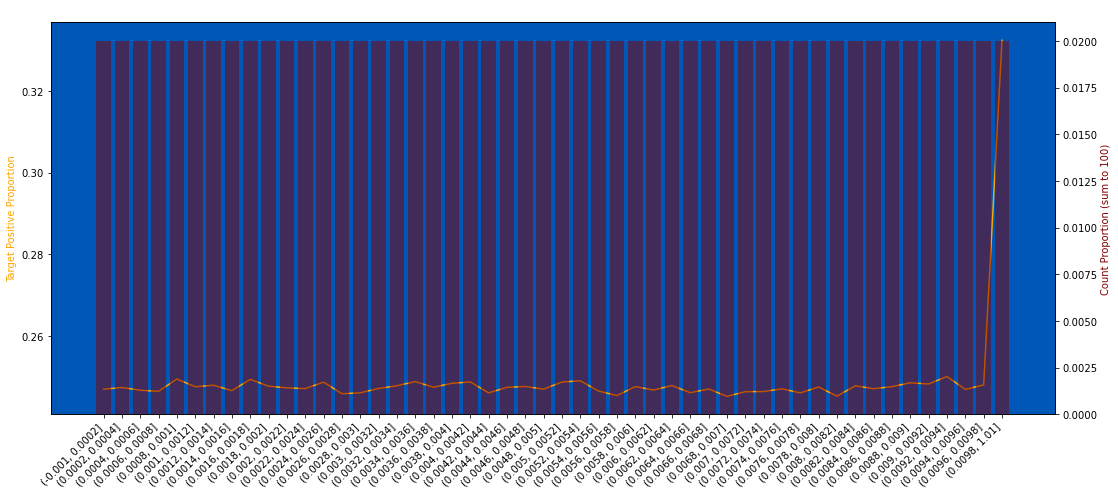

In [123]:
plot_target_check(train, "R_22", q=50, use_raw_bin=True)

In [124]:
%%time
df_list = round_dfs(df_list, col="R_22", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 266 ms, sys: 1.14 s, total: 1.41 s
Wall time: 2.39 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


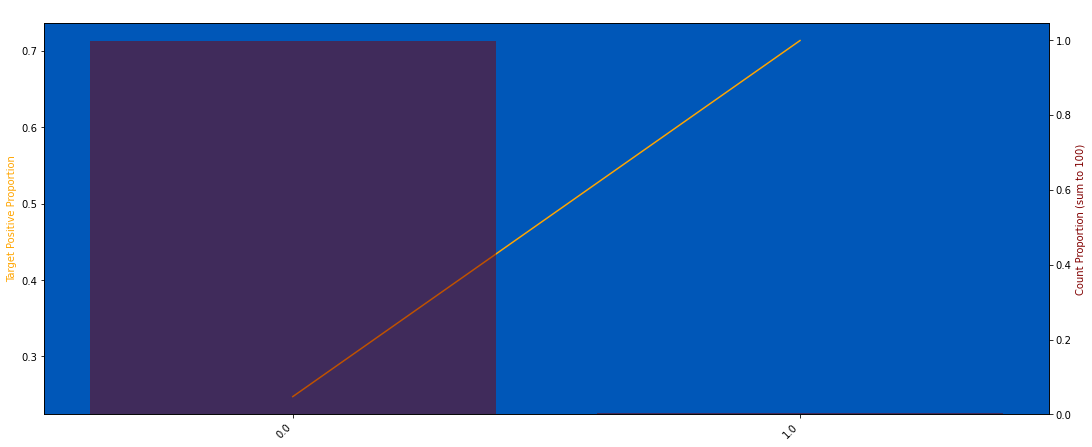

In [125]:
plot_target_check(train, "R_22", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

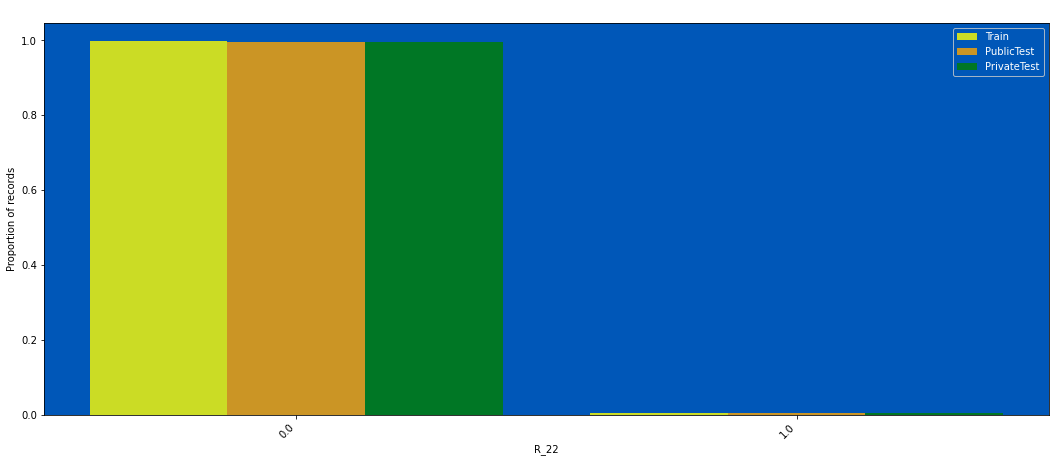

In [126]:
plot_train_test_distribution(df_list, "R_22", nunique_thr=500, without_drop_tail=True)

### R_23

0 null count, 0.000 null proportion
nan of the targets have label = 1


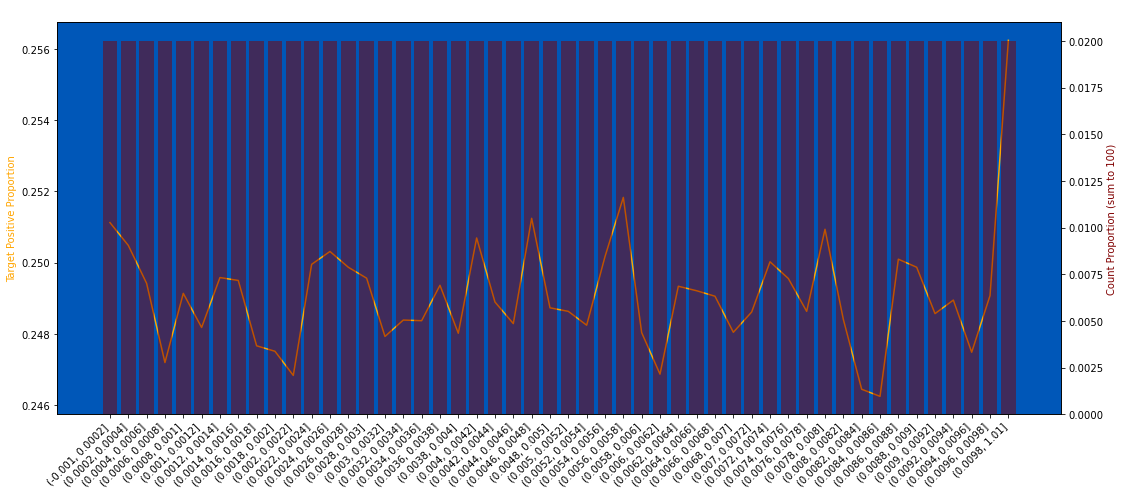

In [127]:
plot_target_check(train, "R_23", q=50, use_raw_bin=True)

In [128]:
%%time
df_list = round_dfs(df_list, col="R_23", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 255 ms, sys: 1 s, total: 1.26 s
Wall time: 2.19 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


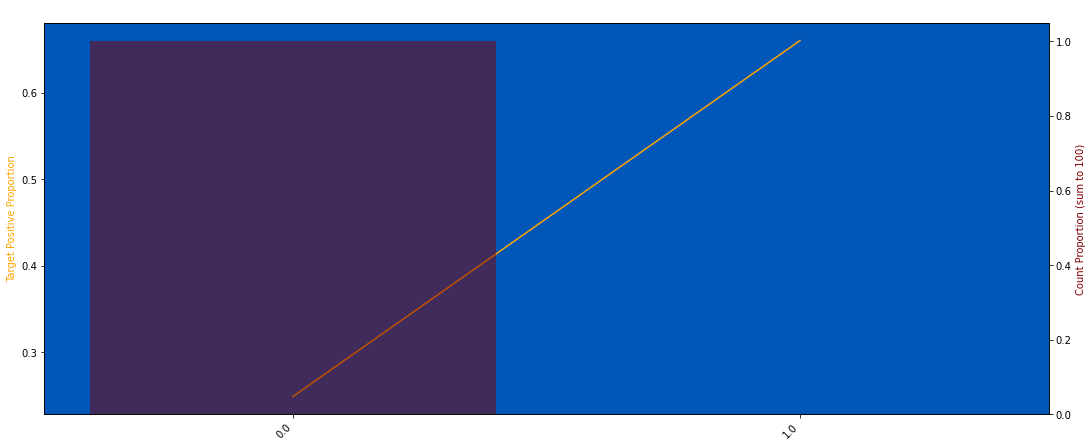

In [129]:
plot_target_check(train, "R_23", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

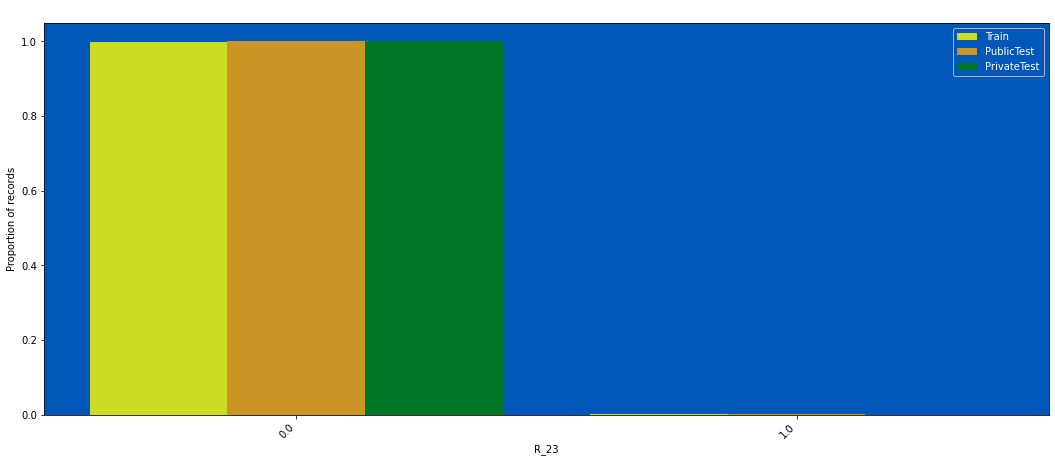

In [130]:
plot_train_test_distribution(df_list, "R_23", nunique_thr=500, without_drop_tail=True)

### R_24

0 null count, 0.000 null proportion
nan of the targets have label = 1


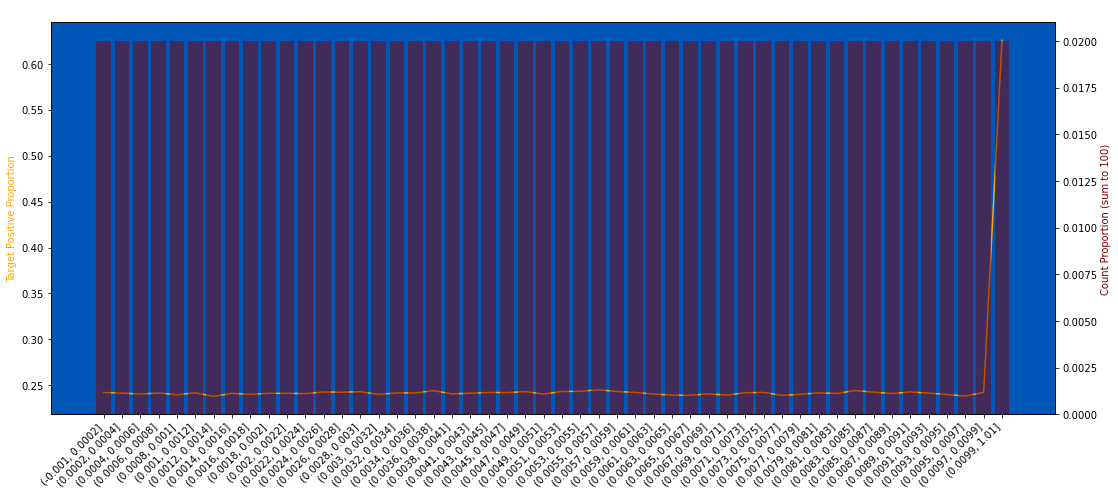

In [131]:
plot_target_check(train, "R_24", q=50, use_raw_bin=True)

In [132]:
%%time
df_list = round_dfs(df_list, col="R_24", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 250 ms, sys: 1.03 s, total: 1.28 s
Wall time: 2.21 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


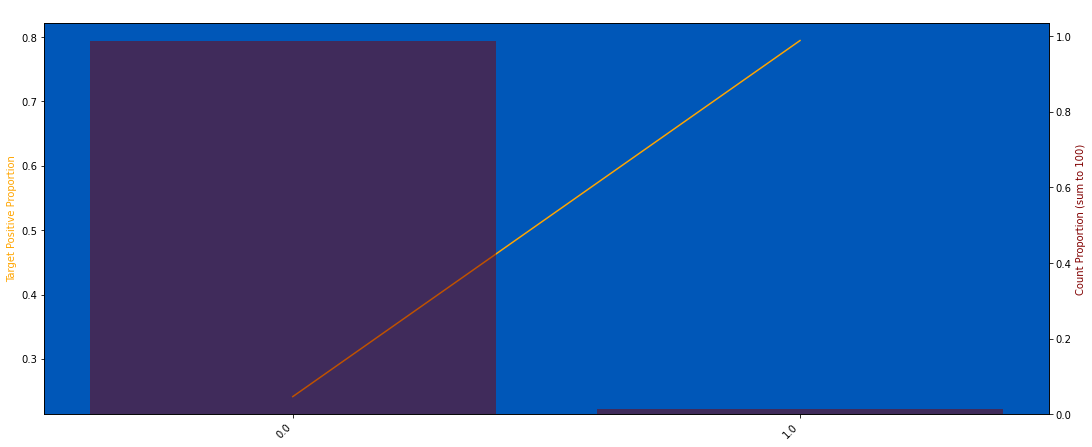

In [133]:
plot_target_check(train, "R_24", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

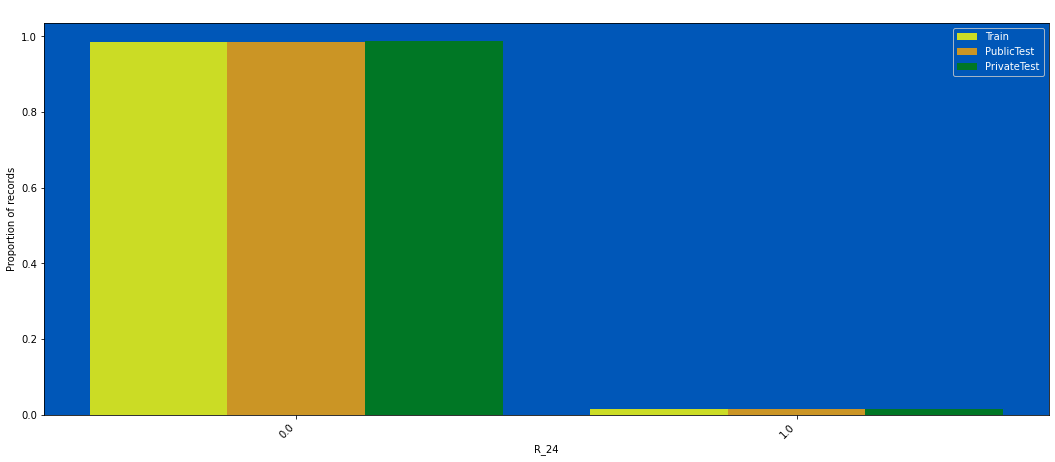

In [134]:
plot_train_test_distribution(df_list, "R_24", nunique_thr=500, without_drop_tail=True)

### R_25

0 null count, 0.000 null proportion
nan of the targets have label = 1


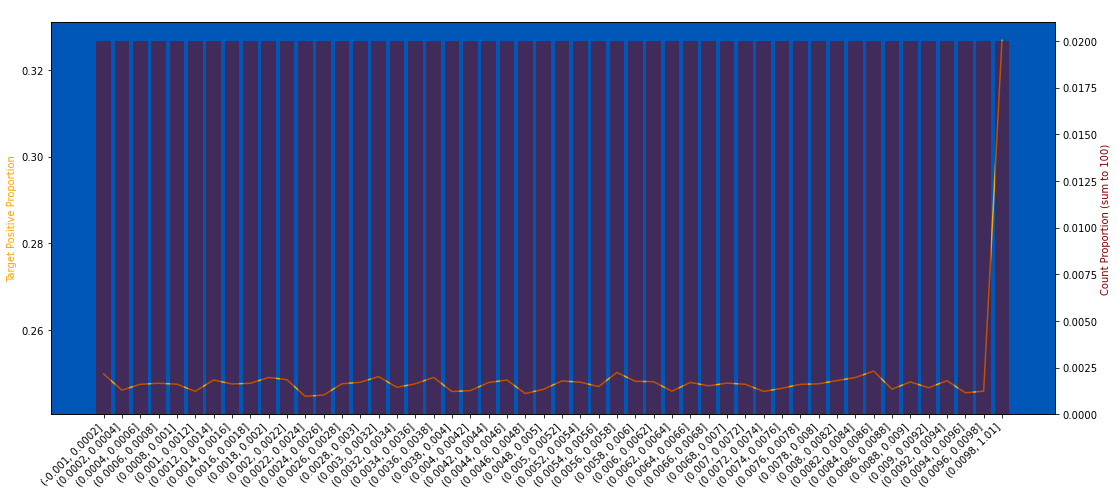

In [135]:
plot_target_check(train, "R_25", q=50, use_raw_bin=True)

In [136]:
%%time
df_list = round_dfs(df_list, col="R_25", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 249 ms, sys: 1 s, total: 1.25 s
Wall time: 2.19 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


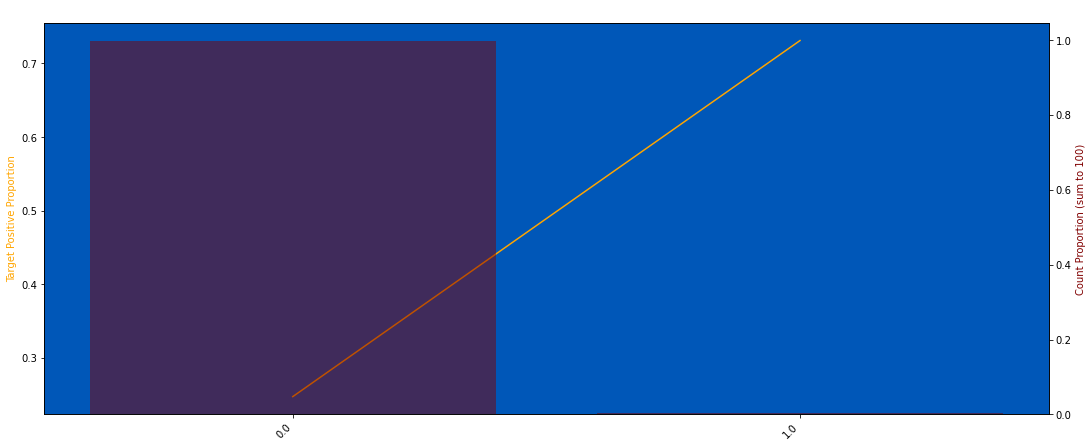

In [137]:
plot_target_check(train, "R_25", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

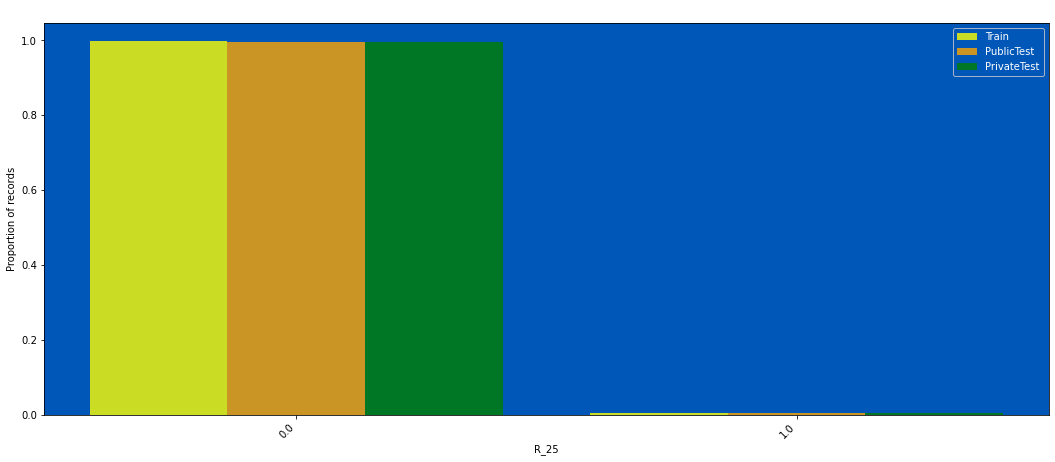

In [138]:
plot_train_test_distribution(df_list, "R_25", nunique_thr=500, without_drop_tail=True)

### R_26

4922146 null count, 0.890 null proportion
0.2082 of the targets have label = 1


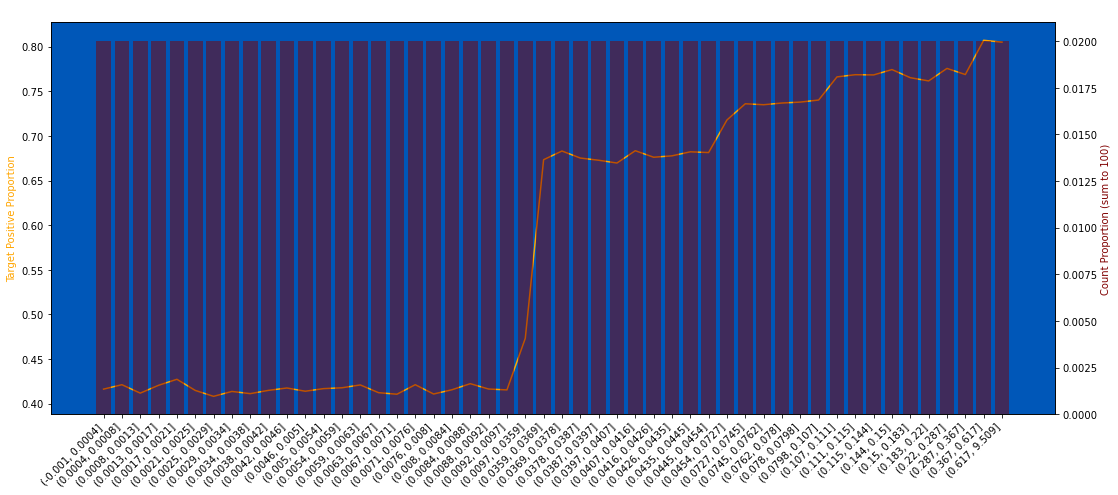

In [139]:
plot_target_check(train, "R_26", q=50, use_raw_bin=True)

In [140]:
%%time
df_list = round_dfs(df_list, col="R_26", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 226 ms, sys: 969 ms, total: 1.2 s
Wall time: 2.29 s


4922146 null count, 0.890 null proportion
0.2082 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


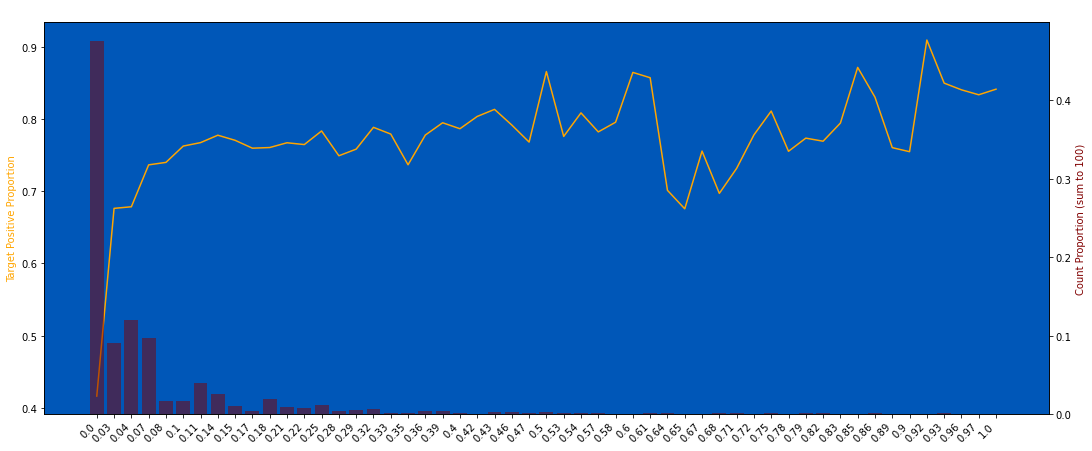

In [141]:
plot_target_check(train, "R_26", q=50, use_raw_bin=True, nunique_thr=50000, strfy_x=True)

In [142]:
for df in df_list:
    df["R_26_"] = (df["R_26"] / 0.0357).round(0)

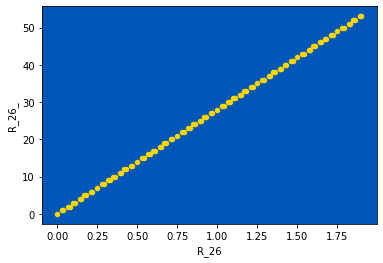

In [143]:
check_binning(train, "R_26", end=100)

In [144]:
for df in df_list:
    df["R_26"] = (df["R_26"] / 0.0357).round(0)

Bottom 1% and Top 1% are dropped from this chart


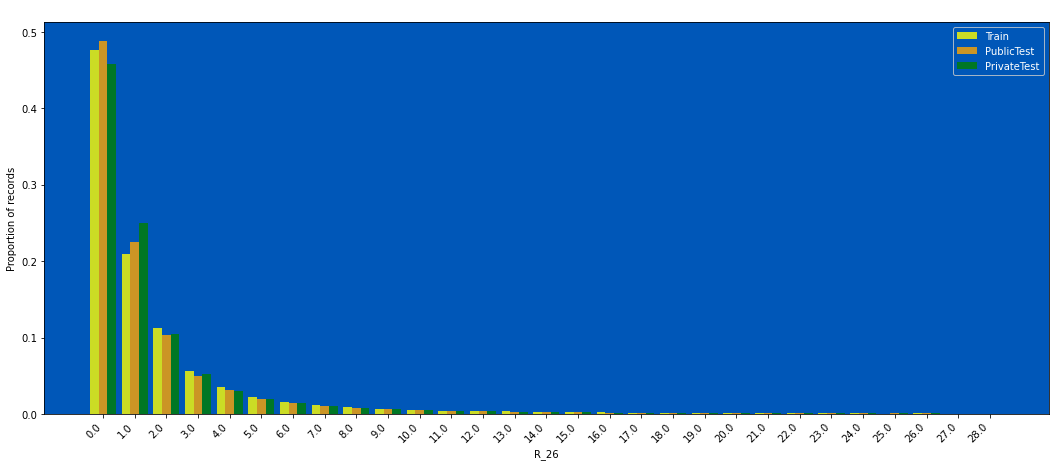

In [145]:
plot_train_test_distribution(df_list, "R_26", nunique_thr=5000)

### R_27

128703 null count, 0.023 null proportion
0.3361 of the targets have label = 1


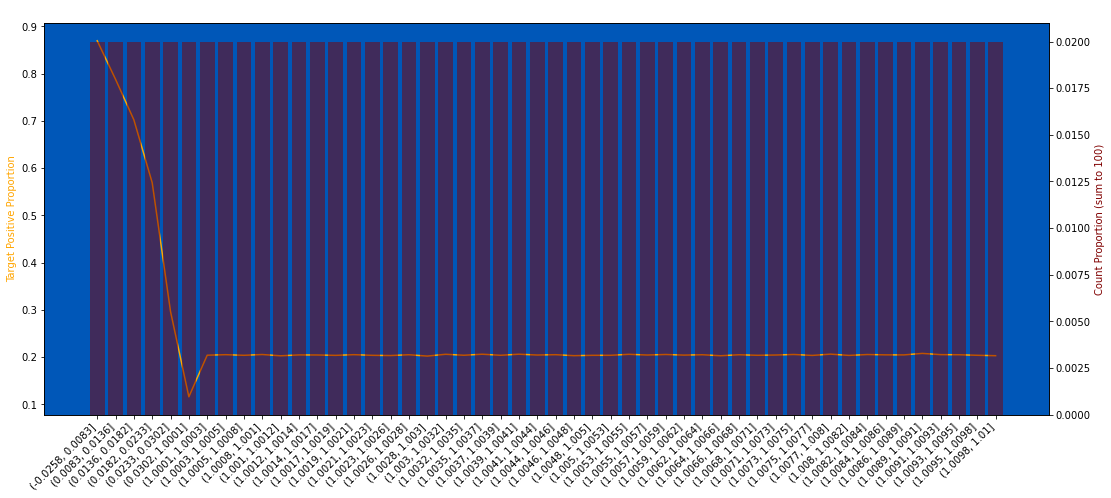

In [146]:
plot_target_check(train, "R_27", q=50, use_raw_bin=True, strfy_x=True)

In [147]:
%%time
df_list = round_dfs(df_list, col="R_27", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 256 ms, sys: 1.01 s, total: 1.27 s
Wall time: 2.23 s


128703 null count, 0.023 null proportion
0.3361 of the targets have label = 1


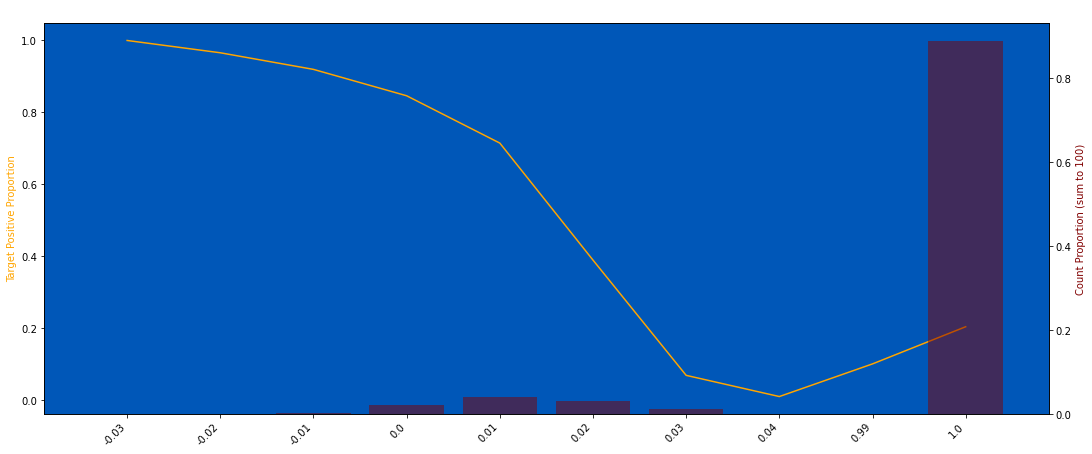

In [148]:
plot_target_check(train, "R_27", q=50, use_raw_bin=True, nunique_thr=50000, strfy_x=True, without_drop_tail=True)

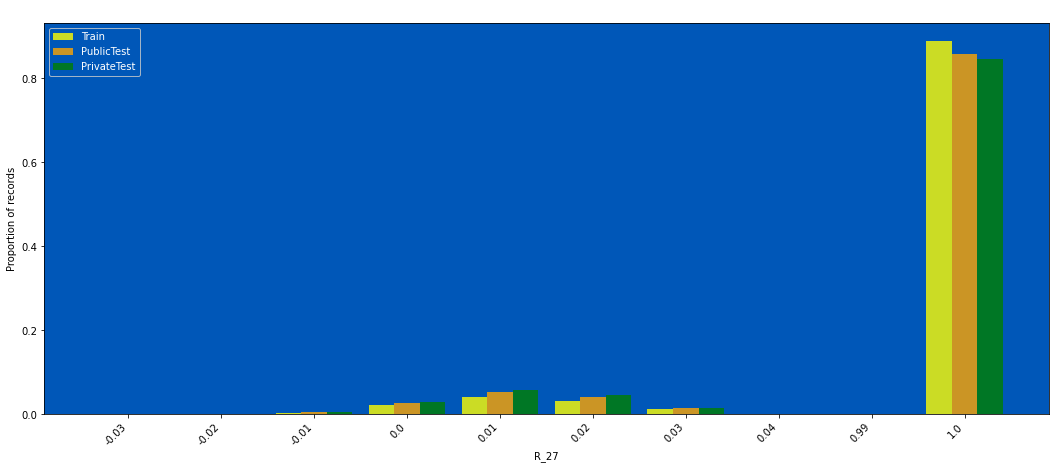

In [149]:
plot_train_test_distribution(df_list, "R_27", nunique_thr=5000, without_drop_tail=True)

### R_28

0 null count, 0.000 null proportion
nan of the targets have label = 1


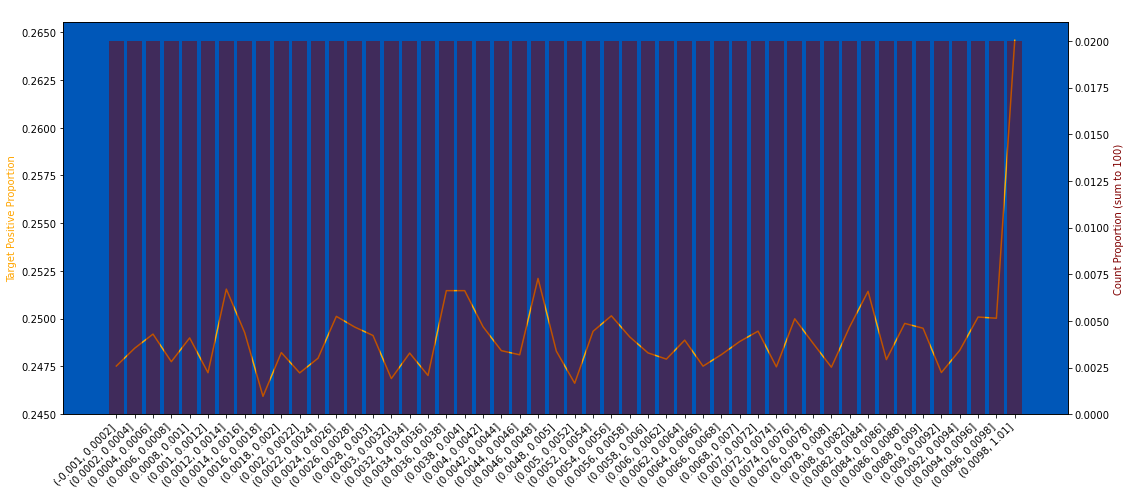

In [150]:
plot_target_check(train, "R_28", q=50, use_raw_bin=True)

In [151]:
%%time
df_list = round_dfs(df_list, col="R_28", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 223 ms, sys: 930 ms, total: 1.15 s
Wall time: 2.09 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


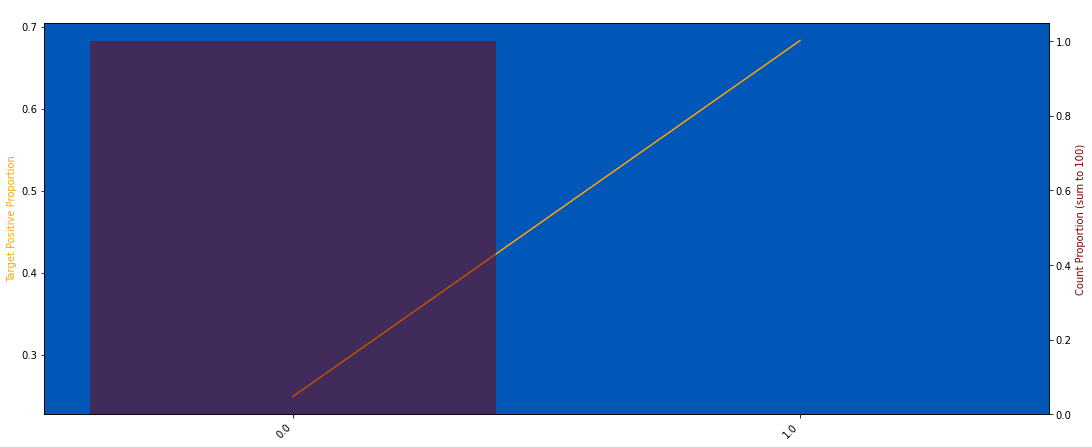

In [152]:
plot_target_check(train, "R_28", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

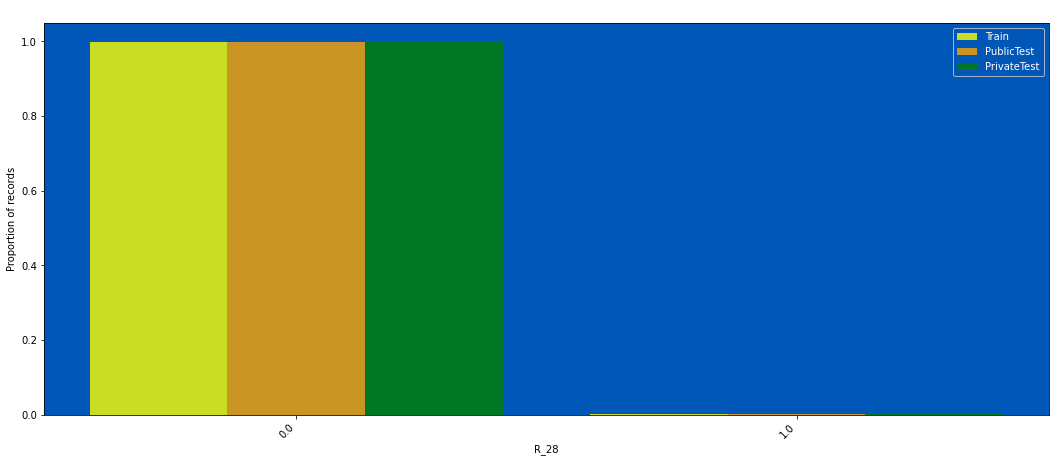

In [153]:
plot_train_test_distribution(df_list, "R_28", nunique_thr=5000, without_drop_tail=True)

### Column checking

In [154]:
from tqdm import tqdm

In [155]:
no_use_features = ["temp"] + df_list[0].columns[df_list[0].columns.str.endswith("_")].tolist()
no_use_features

['temp', 'R_1_', 'R_9_', 'R_11_', 'R_26_']

In [156]:
%%time
for df in tqdm(df_list):
    df.drop(columns=no_use_features, errors="ignore", inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.81it/s]

CPU times: user 633 ms, sys: 1 s, total: 1.64 s
Wall time: 1.68 s


In [157]:
all_columns = get_cols(df_list[0], ["R_"])
print(all_columns)

['R_1', 'R_2', 'R_3', 'R_4', 'R_5', 'R_6', 'R_7', 'R_8', 'R_9', 'R_10', 'R_11', 'R_12', 'R_13', 'R_14', 'R_15', 'R_16', 'R_17', 'R_18', 'R_19', 'R_20', 'R_21', 'R_22', 'R_23', 'R_24', 'R_25', 'R_26', 'R_27', 'R_28']


In [158]:
d_col_nunique = df_list[0][all_columns].nunique()
less_unique_d_cols = d_col_nunique[d_col_nunique < 99].index.tolist()
for d in less_unique_d_cols:
    if df_list[0][d].dtype != np.int32:
        print(d, ":", df_list[0][d].dtype, "\n", sorted(df_list[0][d].unique().tolist()), "\n")

R_1 : float64 
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0] 

R_2 : float64 
 [0.0, 1.0] 

R_3 : float64 
 [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.5, 7.7, 7.8, 7.9, 8.0, 8.2, 8.3, 8.4, 8.5, 8.8, 9.1, 9.3, 9.4, 9.7, 10.3, 10.8, 11.6] 

R_4 : float64 
 [0.0, 1.0] 

R_5 : float64 
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 43.0, 47.0, 48.0, 61.0, 70.0] 

R_8 : float64 
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12

In [159]:
cols = list(
    set(less_unique_d_cols) - set(["R_3", "R_12", "R_27"])
)

In [160]:
for col in tqdm(cols):
    for df in df_list:
        df[col] = integerize(df[col])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:05<00:00,  3.74it/s]


In [161]:
%%time
train = df_list[0]
test = pd.concat(df_list[1:], axis=0)
test = test.sort_values(by=["customer_ID", "S_2"]).reset_index(drop=True)

CPU times: user 4.43 s, sys: 1.39 s, total: 5.82 s
Wall time: 6.02 s


In [162]:
train.shape, test.shape

((5531451, 31), (11363762, 30))

In [163]:
float64_columns = train.select_dtypes("float64").columns.tolist()
for col in float64_columns:
    temp = df_list[-1][col].astype(np.float32).values
    if (temp - df_list[-1][col]).abs().max() < 1e-4:
        print(f"{col} fulfill criteria to convert to float32")
        for df in df_list:
            df[col] = df[col].astype(np.float32)

R_3 fulfill criteria to convert to float32
R_6 fulfill criteria to convert to float32
R_7 fulfill criteria to convert to float32
R_12 fulfill criteria to convert to float32
R_26 fulfill criteria to convert to float32
R_27 fulfill criteria to convert to float32


In [164]:
for d in tqdm(all_columns):
    for df in df_list:
        df[d] = df[d].fillna(-127)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 43.53it/s]


In [165]:
%%time
train.to_parquet(f"{INTERIM_TRAIN_PARQUET_PATH}/risk.parquet")
test.to_parquet(f"{INTERIM_TEST_PARQUET_PATH}/risk.parquet")

CPU times: user 5.77 s, sys: 493 ms, total: 6.27 s
Wall time: 6.05 s


In [166]:
test.shape

(11363762, 30)

In [167]:
END = time.time()

In [168]:
print(f"{END - START:.2f} seconds elapsed")

195.61 seconds elapsed


In [169]:
t = read_file(f"{INTERIM_TRAIN_PARQUET_PATH}/risk2.parquet", replace_negative127=False)

Shape of data: (5531451, 31)
